#imp

In [1]:
import pandas as pd
pd.set_option("max_colwidth", 160)
pd.set_option("display.max_columns", None)

import numpy as np
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.style.use("seaborn-talk")



def load_data(file_path, indx = True, indx_col = 0):
  '''Parameters:
  file_path: path to your excel or csv file with data,

  indx: boolean - whether there is index column in your file (usually it is the first column) --> *by default it is set to True

  indx_col: int - if your file has an index column, specify column number here --> *by default it is equal to 0 (first column)
  '''
  if indx == True and file_path.endswith(".xlsx"):
    data = pd.read_excel(file_path, index_col = indx_col)
  elif indx == False and file_path.endswith(".xlsx"):
    data = pd.read_excel(file_path)

  elif indx == True and file_path.endswith(".csv"):
    data = pd.read_csv(file_path, index_col = indx_col)
  elif indx == False and file_path.endswith(".csv"):
    data = pd.read_csv(file_path)
  return data


In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import kruskal

In [2]:
from statistics import mean, stdev
from math import sqrt
from sklearn import metrics

def cohend(d1, d2):
 # calculate the size of samples
 n1, n2 = len(d1), len(d2)
 # calculate the variance of the samples
 s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
 # calculate the pooled standard deviation
 s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
 # calculate the means of the samples
 u1, u2 = np.mean(d1), np.mean(d2)
 # calculate the effect size
 return (u1 - u2) / s

In [3]:
#!pip install scipy --upgrade
from scipy.stats import ttest_rel, ttest_ind, mannwhitneyu, wilcoxon

#load data

In [5]:
df = load_data('/content/res1_up.csv', indx=False)
df.shape

(395, 20)

In [6]:
df.head()

,kod,komunikat,bon,płeć,wiek,tryb,rok,waznosc,Nastroj1,Nastroj2,indeks_przychylności,wynik_ogólny,nastroj_diff,Nastroj1_mapped,komunikat_mapped,Nastroj1_komunikat_congruence,Nastroj1_komunikat_congruence_abs,plec_komunikat_bon,komunikat_bon,Nastroj1_komunikat_congruence_komunikat
0,OER01,0,1,1,19,1,1,4,3,3,4.0,4.0000,0,3,3,0,0,k_0_1,0_1,0_0
1,EMJ05,0,1,1,20,1,1,1,3,3,4.0,2.3750,0,3,3,0,0,k_0_1,0_1,0_0
2,MAP06,0,1,1,19,1,1,1,3,2,3.5,4.0625,-1,3,3,0,0,k_0_1,0_1,0_0
3,AGK04,0,1,1,20,1,1,3,4,4,4.0,3.6250,0,5,3,2,2,k_0_1,0_1,2_0
4,PJZ05,0,1,1,19,1,1,3,4,4,4.0,3.8750,0,5,3,2,2,k_0_1,0_1,2_0


##preprocessing

In [ ]:
df = df.dropna(axis=1)

In [ ]:
kods = ['KJA09', 'XX60', 'XX72', 'X204']

In [ ]:
df = df[ ~(df['kod osoby'].isin(kods) ) ]
df.shape

(395, 21)

In [ ]:
df.describe()

,bon,wiek,rokstudiów,waznosc,Nastroj1,Nastroj2,PAS1,PAS2,PAS3,PAS4,PAS5,PAS6,PAS7,PAS8,PAS9,indeks_przychylności,wynik_ogólny
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.496203,23.435443,2.481013,3.387342,3.063291,2.982278,3.693671,3.427848,3.556962,2.716456,2.863291,3.078481,2.691139,3.473418,3.293671,3.193671,3.277139
std,0.500620,6.403343,1.501782,1.278221,0.996718,0.996028,1.094442,1.263198,1.237597,1.117742,0.985450,1.267083,1.304346,1.018198,1.153162,1.209558,0.893248
min,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.120000
25%,0.000000,20.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.620000
50%,0.000000,22.000000,1.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,3.500000,3.380000
75%,1.000000,24.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,1.000000,99.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df['nastroj_diff'] = df['Nastroj 2'] - df['Nastroj 1']

In [ ]:
df.columns = ['kod', 'komunikat', 'bon', 'plec', 'wiek', 'tryb',
       'rokstudiów', 'waznosc', 'Nastroj1', 'Nastroj2',
       'PAS1', 'PAS2', 'PAS3', 'PAS4', 'PAS5', 'PAS6', 'PAS7', 'PAS8',
       'PAS9', 'indeks_przychylności', 'wynik_ogólny']

In [ ]:
df['typ komunikatu'] = df['typ komunikatu'].str.strip()

In [ ]:
df['typ komunikatu'] = df['typ komunikatu'].map({'neutralny':0, 'negatywny':2, 'pozytywny':1})
df['płeć'] = df['płeć'].map({'k':1, 'm':2, 'inna':3, 'wnp':0})
df['tryb studiów'] = df['tryb studiów'].map({"S":1, "NS":2})

In [ ]:
df.wynik_ogólny = df.wynik_ogólny.round(2)

In [ ]:
df.wiek.describe().round(1)

count    399.0
mean      23.7
std        7.5
min       18.0
25%       20.0
50%       22.0
75%       24.0
max       99.0
Name: wiek, dtype: float64

In [ ]:
df.loc[df.wiek == 99, 'wiek']

In [ ]:
df.loc[df.wiek == 99, 'wiek'] = 24

In [ ]:
df[df['rok studiów'] == 1]['osobista waznosc egzaminu'].describe().round(1)

count    203.0
mean       3.6
std        6.8
min        1.0
25%        2.0
50%        3.0
75%        4.0
max       99.0
Name: osobista waznosc egzaminu, dtype: float64

In [ ]:
df.loc[df['osobista waznosc egzaminu'] == 99, 'osobista waznosc egzaminu'] = 3

In [7]:
df['Nastroj1_3cat'] = df.Nastroj1.map({3:0, 1:2, 2:2}).fillna(1)
df['Nastroj2_3cat'] = df.Nastroj2.map({3:0, 1:2, 2:2}).fillna(1)

df['waznosc_3cat'] = df.waznosc.map({3:0, 1:2, 2:2}).fillna(1)

In [ ]:
df.drop(columns=cols_pas).to_csv('res1_up.csv', index= False)

In [ ]:
df['Nastroj1_mapped'] = df.Nastroj1.map({3:1, 1:0, 2:0, 5:2, 4:2}) # im wyzsza wartosc tym bardziej pozytywny neg (0) - neu (1) - pos (2)
df['komunikat_mapped'] = df.komunikat.map({0:1, 1:2, 2:0})

df['Nastroj1_komunikat_congruence'] = df['Nastroj1_mapped'] - df['komunikat_mapped']
df['Nastroj1_komunikat_congruence'].value_counts()

#Article analyses

##PAS score - dep variable

In [ ]:
df['Nastroj1_3cat_komunikat'] = df.Nastroj1_3cat.map({0:'neutral', 1:'good', 2:'bad'}) + "_" +\
                                 df.komunikat.map({0:'neutral', 1:'positive', 2:'negative'})

df['Nastroj1_3cat_komunikat'].value_counts()

neutral_neutral     58
good_negative       52
good_positive       51
neutral_negative    45
bad_positive        40
neutral_positive    40
good_neutral        39
bad_negative        36
bad_neutral         34
Name: Nastroj1_3cat_komunikat, dtype: int64

In [ ]:
df.groupby(['Nastroj1_3cat_komunikat'])['Nastroj1', 'Nastroj2',
                                           'nastroj_diff', 'wynik_ogólny'].mean().round(2).reset_index().sort_values(by ='wynik_ogólny')#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,Nastroj1_3cat_komunikat,Nastroj1,Nastroj2,nastroj_diff,wynik_ogólny
1,bad_neutral,1.65,1.85,0.21,2.81
0,bad_negative,1.83,1.94,0.11,2.96
6,neutral_negative,3.00,2.64,-0.36,3.13
3,good_negative,4.15,3.33,-0.83,3.29
2,bad_positive,1.78,2.65,0.88,3.32
4,good_neutral,4.10,3.74,-0.36,3.34
5,good_positive,4.16,3.92,-0.24,3.39
7,neutral_neutral,3.00,3.02,0.02,3.47
8,neutral_positive,3.00,3.15,0.15,3.56


In [ ]:
df['Nastroj2_3cat_komunikat'] = df.Nastroj2_3cat.map({0:'neutral', 1:'good', 2:'bad'}) + "_" +\
                                 df.komunikat.map({0:'neutral', 1:'positive', 2:'negative'})

df['Nastroj2_3cat_komunikat'].value_counts()

bad_negative        60
neutral_neutral     58
good_positive       57
neutral_positive    52
neutral_negative    44
good_neutral        37
bad_neutral         36
good_negative       29
bad_positive        22
Name: Nastroj2_3cat_komunikat, dtype: int64

In [ ]:
df.groupby(['Nastroj2_3cat_komunikat'])['Nastroj1', 'Nastroj2',
                                           'nastroj_diff', 'wynik_ogólny'].mean().round(2).reset_index().sort_values(by ='wynik_ogólny')#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,Nastroj2_3cat_komunikat,Nastroj1,Nastroj2,nastroj_diff,wynik_ogólny
2,bad_positive,2.23,1.73,-0.50,2.59
0,bad_negative,2.68,1.78,-0.90,2.66
1,bad_neutral,1.92,1.67,-0.25,2.86
4,good_neutral,3.78,4.05,0.27,3.41
7,neutral_neutral,3.12,3.00,-0.12,3.42
8,neutral_positive,2.71,3.00,0.29,3.42
6,neutral_negative,3.09,3.00,-0.09,3.43
3,good_negative,4.14,4.24,0.10,3.75
5,good_positive,3.74,4.18,0.44,3.75


In [ ]:
df['Nastroj1_3cat_waznosc_3cat'] = df.Nastroj1_3cat.map({0:'moderate', 1:'good', 2:'bad'}) +"-" +\
                                df.waznosc_3cat.map({0:'medium', 1:'high', 2:'low'})

df['Nastroj1_3cat_waznosc_3cat'].value_counts()

moderate-high      76
good-high          69
bad-high           54
good-medium        38
moderate-low       36
good-low           35
moderate-medium    31
bad-low            31
bad-medium         25
Name: Nastroj1_3cat_waznosc_3cat, dtype: int64

In [ ]:
for dep in {'wynik_ogólny'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+C(Nastroj1_3cat)+C(Nastroj2_3cat)+C(waznosc_3cat)+\
                  C(Nastroj1_3cat):C(komunikat)+ C(Nastroj2_3cat):C(komunikat) +\
                  C(Nastroj1_3cat):C(waznosc_3cat)+ C(Nastroj2_3cat):C(waznosc_3cat)+\
                  C(komunikat):C(Nastroj1_3cat):C(waznosc_3cat)+\
                  C(komunikat):C(Nastroj2_3cat):C(waznosc_3cat)""",
              data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

wynik_ogólny
                                                 sum_sq     df        F  \
C(komunikat)                                     1.0471    2.0   0.9567   
C(Nastroj1_3cat)                                 5.0352    2.0   4.6006   
C(Nastroj2_3cat)                                41.9308    2.0  38.3117   
C(waznosc_3cat)                                 28.3772    2.0  25.9279   
C(Nastroj1_3cat):C(komunikat)                    6.4830    4.0   2.9617   
C(Nastroj2_3cat):C(komunikat)                    5.8941    4.0   2.6927   
C(Nastroj1_3cat):C(waznosc_3cat)                 5.3788    4.0   2.4573   
C(Nastroj2_3cat):C(waznosc_3cat)                 1.0528    4.0   0.4810   
C(komunikat):C(Nastroj1_3cat):C(waznosc_3cat)    8.7835   12.0   1.3376   
C(komunikat):C(Nastroj2_3cat):C(waznosc_3cat)    5.2824    8.0   1.2066   
Residual                                       191.5314  350.0      NaN   

                                               PR(>F)  
C(komunikat)                  

In [ ]:
df.Nastroj2_3cat.unique()

array([0., 2., 1.])

In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_3cat_komunikat'],
                          alpha=0.05)
  print(tukey)

wynik_ogólny
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1           group2      meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------
    bad_negative      bad_neutral  -0.1475 0.9987 -0.8009 0.5059  False
    bad_negative     bad_positive   0.3616 0.6841 -0.2661 0.9893  False
    bad_negative    good_negative   0.3291 0.7259 -0.2633 0.9215  False
    bad_negative     good_neutral   0.3779  0.637 -0.2536 1.0094  False
    bad_negative    good_positive   0.4279 0.3792 -0.1669 1.0227  False
    bad_negative neutral_negative   0.1729 0.9938  -0.438 0.7839  False
    bad_negative  neutral_neutral   0.5123  0.132 -0.0674 1.0921  False
    bad_negative neutral_positive   0.6007 0.0731  -0.027 1.2284  False
     bad_neutral     bad_positive   0.5091 0.2392 -0.1282 1.1464  False
     bad_neutral    good_negative   0.4765 0.2516 -0.1261 1.0791  False
     bad_neutral     good_neutral   0.5254 0.2088 -

In [ ]:
df.groupby(['Nastroj1_3cat_komunikat'])['Nastroj1', 'Nastroj2',
                                           'nastroj_diff'].mean().round(2).reset_index().sort_values(by ='Nastroj2')#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,Nastroj1_3cat_komunikat,Nastroj1,Nastroj2,nastroj_diff
1,bad_neutral,1.65,1.85,0.21
0,bad_negative,1.83,1.94,0.11
6,neutral_negative,3.00,2.64,-0.36
2,bad_positive,1.78,2.65,0.88
7,neutral_neutral,3.00,3.02,0.02
8,neutral_positive,3.00,3.15,0.15
3,good_negative,4.15,3.33,-0.83
4,good_neutral,4.10,3.74,-0.36
5,good_positive,4.16,3.92,-0.24


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj2_3cat_komunikat'],
                          alpha=0.05)
  print(tukey)

wynik_ogólny
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1           group2      meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------
    bad_negative      bad_neutral   0.2094 0.9497 -0.3219 0.7407  False
    bad_negative     bad_positive  -0.0615    1.0 -0.6896 0.5667  False
    bad_negative    good_negative   1.0905    0.0  0.5205 1.6605   True
    bad_negative     good_neutral   0.7553 0.0003  0.2285 1.2821   True
    bad_negative    good_positive   1.0915    0.0  0.6254 1.5577   True
    bad_negative neutral_negative   0.7738 0.0001  0.2735  1.274   True
    bad_negative  neutral_neutral   0.7607    0.0  0.2967 1.2248   True
    bad_negative neutral_positive   0.7619    0.0  0.2844 1.2394   True
     bad_neutral     bad_positive  -0.2708 0.9474 -0.9529 0.4112  False
     bad_neutral    good_negative   0.8811 0.0005  0.2522   1.51   True
     bad_neutral     good_neutral   0.5459 0.0952 -

In [ ]:
tt = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
tt.head()

,group1,group2,meandiff,p-adj,lower,upper,reject
0,bad_negative,bad_neutral,0.1258,0.9982,-0.4055,0.6571,False
1,bad_negative,bad_positive,-0.7639,0.0001,-1.2743,-0.2535,True
2,bad_negative,good_negative,-0.5620,0.0093,-1.0436,-0.0803,True
3,bad_negative,good_neutral,-0.8697,0.0000,-1.3831,-0.3562,True
4,bad_negative,good_positive,-0.7565,0.0001,-1.2401,-0.2729,True


In [ ]:
tt[tt.reject == True].to_excel('/content/drive/MyDrive/temporal.xlsx')

In [ ]:
df.groupby(['Nastroj1_3cat_waznosc_3cat'])['wynik_ogólny'].mean().round(2).reset_index()#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,Nastroj1_3cat_waznosc_3cat,wynik_ogólny
0,bad_high,3.35
1,bad_low,2.43
2,bad_medium,3.15
3,good_high,3.45
4,good_low,2.99
5,good_medium,3.46
6,neutral_high,3.65
7,neutral_low,3.06
8,neutral_medium,3.16


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_3cat_waznosc_3cat'],
                          alpha=0.05)
  print(tukey)

wynik_ogólny
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1        group2     meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
    bad_high        bad_low  -0.9207 0.0001 -1.5114   -0.33   True
    bad_high     bad_medium  -0.2067 0.9842 -0.8409  0.4275  False
    bad_high      good_high    0.096 0.9994 -0.3803  0.5723  False
    bad_high       good_low  -0.3667 0.5369 -0.9356  0.2022  False
    bad_high    good_medium   0.1096 0.9995 -0.4455  0.6648  False
    bad_high   neutral_high   0.2922 0.5768 -0.1744  0.7588  False
    bad_high    neutral_low  -0.2969 0.7811  -0.861  0.2672  False
    bad_high neutral_medium  -0.1969 0.9817 -0.7877  0.3938  False
     bad_low     bad_medium    0.714 0.0443  0.0093  1.4187   True
     bad_low      good_high   1.0167    0.0  0.4499  1.5836   True
     bad_low       good_low    0.554 0.1611 -0.0926  1.2006  False
     bad_low    good_medium   1.0303    0.0  0.39

In [ ]:
df[df.Nastroj2_3cat.astype('int') == 0].groupby('waznosc_3cat').wynik_ogólny.mean().round(3).sort_values()# neu

waznosc_3cat
2.0    2.980
0.0    3.300
1.0    3.681
Name: wynik_ogólny, dtype: float64

In [ ]:
df[df.komunikat == 0].groupby('waznosc_3cat').wynik_ogólny.mean().round(3).sort_values()# neu

waznosc_3cat
2.0    2.892
0.0    3.317
1.0    3.391
Name: wynik_ogólny, dtype: float64

In [ ]:
df[df.Nastroj2_3cat.astype('int') == 1].groupby('waznosc_3cat').wynik_ogólny.mean().round(3).sort_values()# neu

waznosc_3cat
2.0    3.261
0.0    3.551
1.0    3.903
Name: wynik_ogólny, dtype: float64

In [ ]:
df[df.komunikat == 1].groupby('waznosc_3cat').wynik_ogólny.mean().round(3).sort_values()# pos

waznosc_3cat
2.0    2.907
0.0    3.334
1.0    3.893
Name: wynik_ogólny, dtype: float64

In [ ]:
df[df.Nastroj2_3cat.astype('int') == 2].groupby('waznosc_3cat').wynik_ogólny.mean().round(3).sort_values()# neu

waznosc_3cat
2.0    2.320
0.0    2.828
1.0    2.871
Name: wynik_ogólny, dtype: float64

In [ ]:
df[df.komunikat == 2].groupby('waznosc_3cat').wynik_ogólny.mean().round(3).sort_values() # neg

waznosc_3cat
2.0    2.719
0.0    3.148
1.0    3.331
Name: wynik_ogólny, dtype: float64

In [ ]:
df.groupby('komunikat').wynik_ogólny.mean().round(3).sort_values()

komunikat
2    3.149
0    3.263
1    3.422
Name: wynik_ogólny, dtype: float64

In [ ]:
df.groupby('waznosc_3cat_komunikat').wynik_ogólny.mean().round(3).sort_values()

waznosc_3cat_komunikat
high_negative      2.719
high_neutral       2.892
high_positive      2.907
medium_negative    3.148
medium_neutral     3.317
low_negative       3.331
medium_positive    3.334
low_neutral        3.391
low_positive       3.893
Name: wynik_ogólny, dtype: float64

In [ ]:
df[df.komunikat != 0].groupby('waznosc_3cat_komunikat').wynik_ogólny.mean().round(3).sort_values()

waznosc_3cat_komunikat
high_negative      2.719
high_positive      2.907
medium_negative    3.148
low_negative       3.331
medium_positive    3.334
low_positive       3.893
Name: wynik_ogólny, dtype: float64

In [ ]:
df.groupby(['Nastroj1_3cat'])['Nastroj1', 'Nastroj2',
                                           'nastroj_diff', 'wynik_ogólny'].mean().round(2).reset_index().sort_values(by ='wynik_ogólny')#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,Nastroj1_3cat,Nastroj1,Nastroj2,nastroj_diff,wynik_ogólny
2,2.0,1.75,2.17,0.42,3.05
1,1.0,4.14,3.65,-0.49,3.34
0,0.0,3.00,2.94,-0.06,3.39


In [11]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -0.0523 0.8717 -0.2985   0.194  False
   0.0    2.0  -0.3443 0.0064  -0.608 -0.0807   True
   1.0    2.0  -0.2921  0.026 -0.5561  -0.028   True
----------------------------------------------------


In [ ]:
df.groupby(['Nastroj2_3cat'])['Nastroj1', 'Nastroj2',
                                           'nastroj_diff', 'wynik_ogólny'].mean().round(2).reset_index().sort_values(by ='wynik_ogólny')#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,Nastroj2_3cat,Nastroj1,Nastroj2,nastroj_diff,wynik_ogólny
2,2.0,2.36,1.74,-0.63,2.71
0,0.0,2.97,3.00,0.03,3.42
1,1.0,3.85,4.15,0.31,3.65


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj2_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0   0.2253 0.0564 -0.0047  0.4553  False
   0.0    2.0  -0.7124    0.0 -0.9451 -0.4797   True
   1.0    2.0  -0.9377    0.0 -1.1828 -0.6926   True
----------------------------------------------------


In [ ]:
df.groupby(['waznosc_3cat'])['Nastroj1', 'Nastroj2',
                                           'nastroj_diff', 'wynik_ogólny'].mean().round(2).reset_index().sort_values(by ='wynik_ogólny')#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,waznosc_3cat,Nastroj1,Nastroj2,nastroj_diff,wynik_ogólny
2,2.0,3.02,2.91,-0.11,2.84
0,0.0,3.15,3.15,0.00,3.28
1,1.0,3.05,2.94,-0.11,3.50


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['waznosc_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0   0.2205 0.0986 -0.0307  0.4717  False
   0.0    2.0  -0.4348 0.0012 -0.7218 -0.1479   True
   1.0    2.0  -0.6553    0.0 -0.8997 -0.4109   True
----------------------------------------------------


###plot mood + involvement

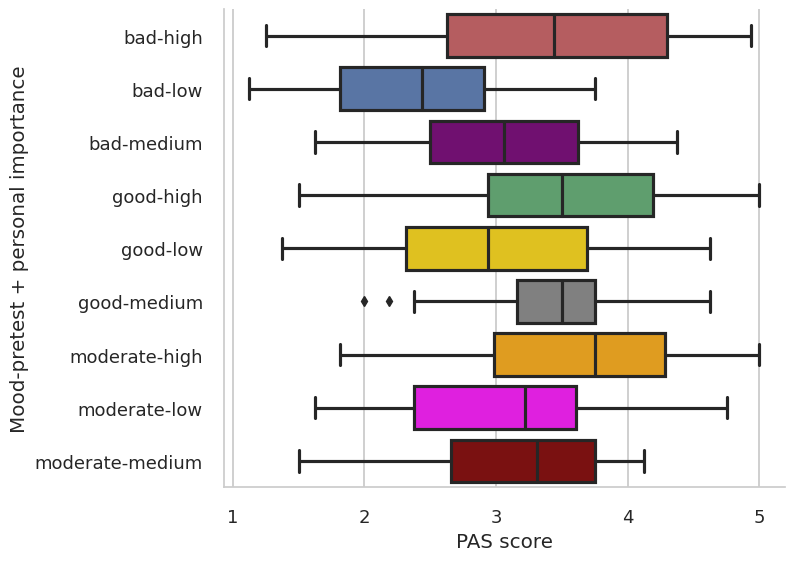

In [ ]:
g = sns.catplot(kind = 'box', data = df.sort_values(by = ['Nastroj1_3cat_waznosc_3cat']),
                y = 'Nastroj1_3cat_waznosc_3cat', x = 'wynik_ogólny', hue = 'Nastroj1_3cat_waznosc_3cat',
            aspect=1.4, height=5.8, dodge=False, legend=False,
                palette = ['r', 'b', 'purple', 'g', 'gold', 'grey', 'orange', 'magenta', 'darkred'])


g.set(xticks=[1,2,3,4,5], xlabel = 'PAS score', ylabel = 'Mood-pretest + personal importance')
plt.show()

In [ ]:
df['Nastroj2_3cat_waznosc_3cat'] = df.Nastroj2_3cat +"-" +\
                                df.waznosc_3cat.map({0:'medium', 1:'high', 2:'low'})

df['Nastroj2_3cat_waznosc_3cat'].value_counts()

moderate-high      83
bad-high           60
good-high          56
moderate-low       41
good-medium        39
bad-low            33
moderate-medium    30
good-low           28
bad-medium         25
Name: Nastroj2_3cat_waznosc_3cat, dtype: int64

In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj2_3cat_waznosc_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
     bad-high         bad-low  -0.5508 0.0278 -1.0693 -0.0322   True
     bad-high      bad-medium  -0.0433    1.0 -0.6129  0.5263  False
     bad-high       good-high   1.0321    0.0  0.5875  1.4767   True
     bad-high        good-low   0.3903 0.3925 -0.1573   0.938  False
     bad-high     good-medium   0.6804 0.0007  0.1883  1.1726   True
     bad-high   moderate-high   0.8099    0.0  0.4044  1.2154   True
     bad-high    moderate-low   0.1093 0.9987 -0.3755  0.5942  False
     bad-high moderate-medium   0.4292 0.2341 -0.1059  0.9642  False
      bad-low      bad-medium   0.5074 0.2376  -0.127  1.1419  False
      bad-low       good-high   1.5828    0.0  1.0577  2.1079   True
      bad-low        good-low   0.9411 0.0001  0.3263  1.5559   True
      bad-low     goo

##Nastroj posttest - dep variable

In [ ]:
for dep in {'Nastroj2_3cat'}:
  print(dep)
  model = ols(f"""{dep} ~ C(Nastroj1_3cat)+C(komunikat)+C(Nastroj1_3cat):C(komunikat)""",
              data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

Nastroj2_3cat
                                 sum_sq     df        F  PR(>F)
C(Nastroj1_3cat)                48.9952    2.0  48.3021  0.0000
C(komunikat)                     9.7391    2.0   9.6013  0.0001
C(Nastroj1_3cat):C(komunikat)   14.7454    4.0   7.2684  0.0000
Residual                       195.7697  386.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:          Nastroj2_3cat   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     17.98
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           7.30e-23
Time:                        12:08:11   Log-Likelihood:                -421.85
No. Observations:                 395   AIC:                             861.7
Df Residuals:                     386   BIC:                             897.5
Df Model:                         

In [ ]:
df.groupby(['Nastroj1_3cat_komunikat'])['Nastroj1', 'Nastroj2',
                                           'nastroj_diff'].mean().round(2).reset_index().sort_values(by ='Nastroj2')#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,Nastroj1_3cat_komunikat,Nastroj1,Nastroj2,nastroj_diff
1,bad_neutral,1.65,1.85,0.21
0,bad_negative,1.83,1.94,0.11
6,neutral_negative,3.00,2.64,-0.36
2,bad_positive,1.78,2.65,0.88
7,neutral_neutral,3.00,3.02,0.02
8,neutral_positive,3.00,3.15,0.15
3,good_negative,4.15,3.33,-0.83
4,good_neutral,4.10,3.74,-0.36
5,good_positive,4.16,3.92,-0.24


In [ ]:
for c in {'Nastroj2_3cat'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_3cat_komunikat'],
                          alpha=0.05)
  print(tukey)

Nastroj2_3cat
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
    bad_negative      bad_neutral   0.1258 0.9982 -0.4055  0.6571  False
    bad_negative     bad_positive  -0.7639 0.0001 -1.2743 -0.2535   True
    bad_negative    good_negative   -0.562 0.0093 -1.0436 -0.0803   True
    bad_negative     good_neutral  -0.8697    0.0 -1.3831 -0.3562   True
    bad_negative    good_positive  -0.7565 0.0001 -1.2401 -0.2729   True
    bad_negative neutral_negative  -0.8833    0.0 -1.3801 -0.3866   True
    bad_negative  neutral_neutral  -1.3113    0.0 -1.7827 -0.8399   True
    bad_negative neutral_positive  -1.1139    0.0 -1.6243 -0.6035   True
     bad_neutral     bad_positive  -0.8897    0.0 -1.4079 -0.3715   True
     bad_neutral    good_negative  -0.6878 0.0005 -1.1778 -0.1978   True
     bad_neutral     good_neutral  -0

In [ ]:
tt = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
tt.head()

,group1,group2,meandiff,p-adj,lower,upper,reject
0,bad_negative,bad_neutral,0.1258,0.9982,-0.4055,0.6571,False
1,bad_negative,bad_positive,-0.7639,0.0001,-1.2743,-0.2535,True
2,bad_negative,good_negative,-0.5620,0.0093,-1.0436,-0.0803,True
3,bad_negative,good_neutral,-0.8697,0.0000,-1.3831,-0.3562,True
4,bad_negative,good_positive,-0.7565,0.0001,-1.2401,-0.2729,True


In [ ]:
tt[tt.reject == True].to_excel('/content/drive/MyDrive/temporal.xlsx')

##Nastroj

In [ ]:
# pos

for d in cc:
  dprzed = p3_pos[d[0]].values
  dpo = p3_pos[d[1]].values
  print(d)

  value, p = ttest_rel(dpo, dprzed, alternative='greater') # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(dpo, dprzed)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

('Nastroj1', 'Nastroj2')
reject H0
t:  2.852 p-value:  0.0025 effect size:  0.22 



In [ ]:
# neg

for d in cc:
  dprzed = p3_neg[d[0]].values
  dpo = p3_neg[d[1]].values
  print(d)

  value, p = ttest_rel(dpo, dprzed, alternative='less')
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(dpo, dprzed)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

('Nastroj1', 'Nastroj2')
reject H0
t:  -5.472 p-value:  0.0 effect size:  -0.41 



In [ ]:
# neu

for d in cc:
  dprzed = p3_neu[d[0]].values
  dpo = p3_neu[d[1]].values
  print(d)


  value, p = ttest_rel(dpo, dprzed)
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(dpo, dprzed)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

('Nastroj1', 'Nastroj2')
do NOT reject H0
-0.847615811384459 0.3982 



In [ ]:
for d in {'wynik_ogólny'}:
  p1 = p3_neu[d].values
  p2 = p3_neg[d].values
  p3 = p3_pos[d].values

  print(d, '\n')

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  print('neu - neg ')

  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")


  value, p = ttest_ind(p1, p3) # , alternative='greater'
  print('neu - pos ')

  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p3)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")


  value, p = ttest_ind(p2, p3) # , alternative='greater'
  print('neg - pos ')

  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p2, p3)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

wynik_ogólny 

neu - neg 
do NOT reject H0
1.0553027231434542 0.2923 

neu - pos 
do NOT reject H0
-1.4623852304790266 0.1448 

neg - pos 
reject H0
t:  -2.451 p-value:  0.0149 effect size:  -0.3 



In [ ]:
for d in {'Nastroj2_3cat'}:
  p1 = p3_neu[d].values
  p2 = p3_neg[d].values
  p3 = p3_pos[d].values

  print(d, '\n')

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  print('neu - neg ')

  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")


  value, p = ttest_ind(p1, p3) # , alternative='greater'
  print('neu - pos ')

  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p3)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")


  value, p = ttest_ind(p2, p3) # , alternative='greater'
  print('neg - pos ')

  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p2, p3)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

Nastroj2_3cat 

neu - neg 
reject H0
t:  -2.733 p-value:  0.0067 effect size:  -0.34 

neu - pos 
do NOT reject H0
0.635148406938338 0.5259 

neg - pos 
reject H0
t:  3.531 p-value:  0.0005 effect size:  0.43 



In [ ]:
for d in {'nastroj_diff'}:
  p1 = p3_neu[d].values
  p2 = p3_neg[d].values
  p3 = p3_pos[d].values

  print(d, '\n')

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  print('neu - neg ')

  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")


  value, p = ttest_ind(p1, p3) # , alternative='greater'
  print('neu - pos ')

  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p3)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")


  value, p = ttest_ind(p2, p3) # , alternative='greater'
  print('neg - pos ')

  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p2, p3)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

nastroj_diff 

neu - neg 
reject H0
t:  3.948 p-value:  0.0001 effect size:  0.49 

neu - pos 
reject H0
t:  -2.825 p-value:  0.0051 effect size:  -0.35 

neg - pos 
reject H0
t:  -5.862 p-value:  0.0 effect size:  -0.72 



In [ ]:
for c in {'nastroj_diff'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat'],
                          alpha=0.05)
  #display results
  print(tukey)

nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.2672 0.0201  0.0338  0.5005   True
     0      2  -0.3677 0.0007 -0.6002 -0.1353   True
     1      2  -0.6349    0.0 -0.8674 -0.4025   True
----------------------------------------------------


##additional for article

In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['waznosc_3cat'],
                          alpha=0.05)
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0   0.2205 0.0986 -0.0307  0.4717  False
   0.0    2.0  -0.4348 0.0012 -0.7218 -0.1479   True
   1.0    2.0  -0.6553    0.0 -0.8997 -0.4109   True
----------------------------------------------------


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_3cat'],
                          alpha=0.05)
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -0.0523 0.8717 -0.2985   0.194  False
   0.0    2.0  -0.3443 0.0064  -0.608 -0.0807   True
   1.0    2.0  -0.2921  0.026 -0.5561  -0.028   True
----------------------------------------------------


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj2_3cat'],
                          alpha=0.05)
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0   0.2253 0.0564 -0.0047  0.4553  False
   0.0    2.0  -0.7124    0.0 -0.9451 -0.4797   True
   1.0    2.0  -0.9377    0.0 -1.1828 -0.6926   True
----------------------------------------------------


In [ ]:
tt = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
tt.head()

,group1,group2,meandiff,p-adj,lower,upper,reject
0,bad_high,bad_low,-0.9207,0.0001,-1.5114,-0.3300,True
1,bad_high,bad_medium,-0.2067,0.9842,-0.8409,0.4275,False
2,bad_high,good_high,0.0960,0.9994,-0.3803,0.5723,False
3,bad_high,good_low,-0.3667,0.5369,-0.9356,0.2022,False
4,bad_high,good_medium,0.1096,0.9995,-0.4455,0.6648,False


In [ ]:
tt[tt.reject == True].to_excel('/content/drive/MyDrive/temporal.xlsx')

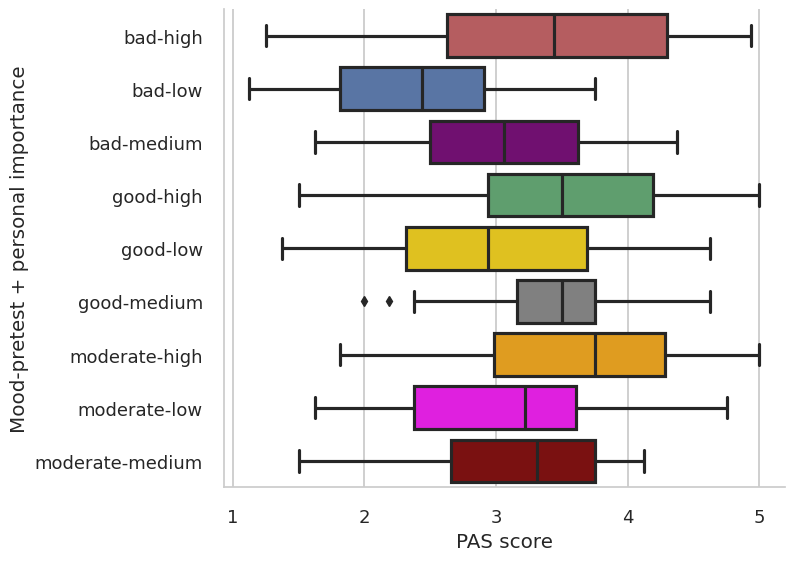

In [ ]:
g = sns.catplot(kind = 'box', data = df.sort_values(by = ['Nastroj1_3cat_waznosc_3cat']),
                y = 'Nastroj1_3cat_waznosc_3cat', x = 'wynik_ogólny', hue = 'Nastroj1_3cat_waznosc_3cat',
            aspect=1.4, height=5.8, dodge=False, legend=False,
                palette = ['r', 'b', 'purple', 'g', 'gold', 'grey', 'orange', 'magenta', 'darkred'])


g.set(xticks=[1,2,3,4,5], xlabel = 'PAS score', ylabel = 'Mood-pretest + personal importance')
plt.show()

In [ ]:
df['Nastroj2_3cat_waznosc_3cat'] = df.Nastroj2_3cat +"-" +\
                                df.waznosc_3cat.map({0:'medium', 1:'high', 2:'low'})

df['Nastroj2_3cat_waznosc_3cat'].value_counts()

moderate-high      83
bad-high           60
good-high          56
moderate-low       41
good-medium        39
bad-low            33
moderate-medium    30
good-low           28
bad-medium         25
Name: Nastroj2_3cat_waznosc_3cat, dtype: int64

In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj2_3cat_waznosc_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
     bad-high         bad-low  -0.5508 0.0278 -1.0693 -0.0322   True
     bad-high      bad-medium  -0.0433    1.0 -0.6129  0.5263  False
     bad-high       good-high   1.0321    0.0  0.5875  1.4767   True
     bad-high        good-low   0.3903 0.3925 -0.1573   0.938  False
     bad-high     good-medium   0.6804 0.0007  0.1883  1.1726   True
     bad-high   moderate-high   0.8099    0.0  0.4044  1.2154   True
     bad-high    moderate-low   0.1093 0.9987 -0.3755  0.5942  False
     bad-high moderate-medium   0.4292 0.2341 -0.1059  0.9642  False
      bad-low      bad-medium   0.5074 0.2376  -0.127  1.1419  False
      bad-low       good-high   1.5828    0.0  1.0577  2.1079   True
      bad-low        good-low   0.9411 0.0001  0.3263  1.5559   True
      bad-low     goo

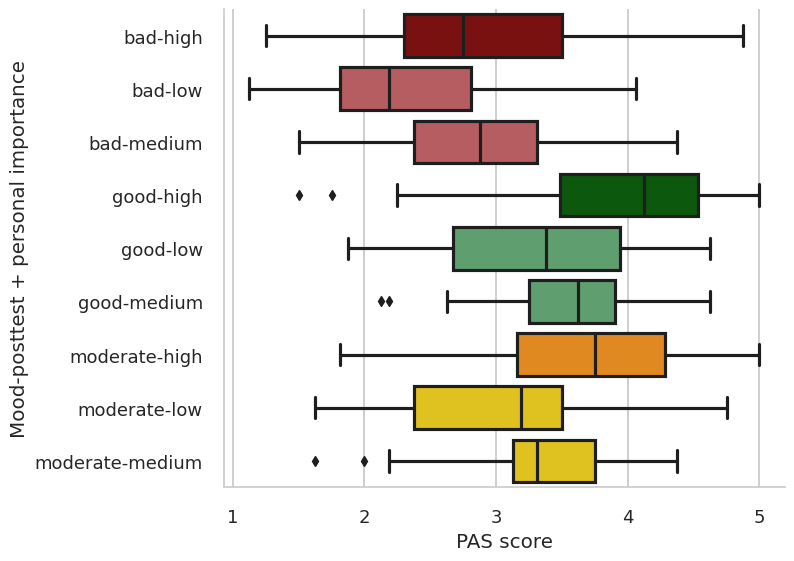

In [ ]:
g = sns.catplot(kind = 'box', data = df.sort_values(by = ['Nastroj2_3cat_waznosc_3cat']),
                y = 'Nastroj2_3cat_waznosc_3cat', x = 'wynik_ogólny', hue = 'Nastroj2_3cat_waznosc_3cat',
            aspect=1.4, height=5.8, dodge=False, legend=False,
                palette = ['darkred', 'r', 'r', 'darkgreen', 'g', 'g', 'darkorange', 'gold', 'gold'])


g.set(xticks=[1,2,3,4,5], xlabel = 'PAS score', ylabel = 'Mood-posttest + personal importance')
plt.show()

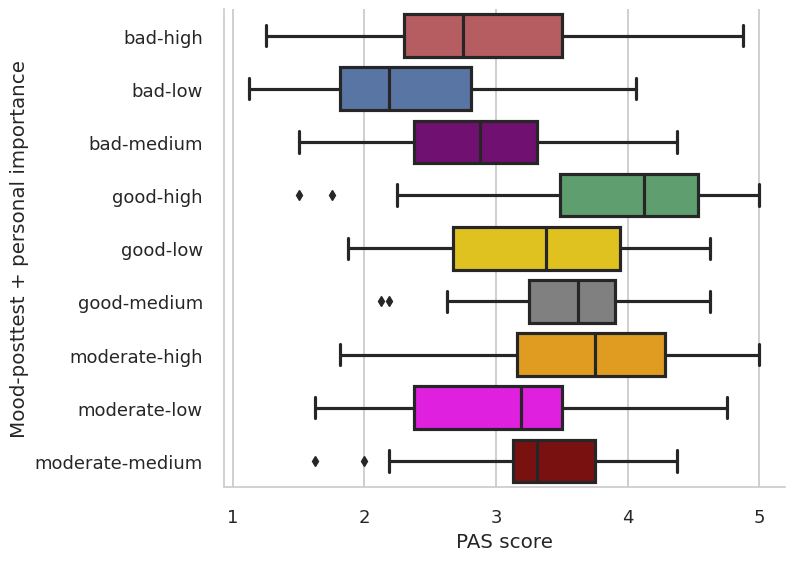

In [ ]:
g = sns.catplot(kind = 'box', data = df.sort_values(by = ['Nastroj2_3cat_waznosc_3cat']),
                y = 'Nastroj2_3cat_waznosc_3cat', x = 'wynik_ogólny', hue = 'Nastroj2_3cat_waznosc_3cat',
            aspect=1.4, height=5.8, dodge=False, legend=False,
                palette = ['r', 'b', 'purple', 'g', 'gold', 'grey', 'orange', 'magenta', 'darkred'])


g.set(xticks=[1,2,3,4,5], xlabel = 'PAS score', ylabel = 'Mood-posttest + personal importance')
plt.show()

In [ ]:
df['Nastroj2_3cat'] = df.Nastroj2_3cat.map({0:'moderate', 1:'good', 2:'bad'})

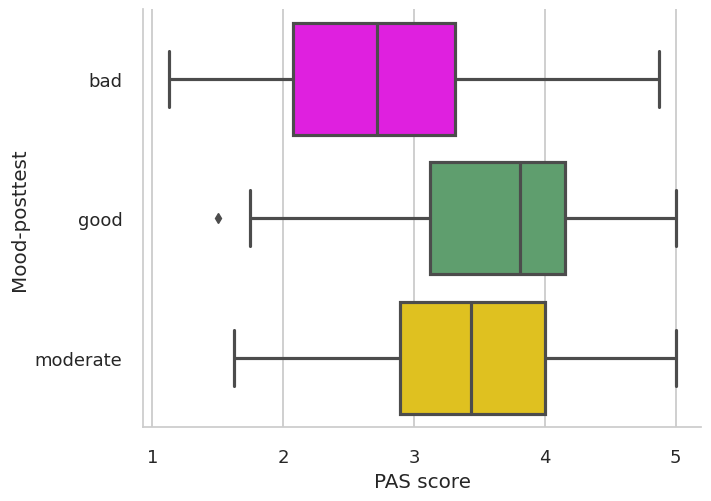

In [ ]:
g = sns.catplot(kind = 'box', data = df.sort_values(by = ['wynik_ogólny']),
                y = 'Nastroj2_3cat', x = 'wynik_ogólny', hue = 'Nastroj2_3cat',
            palette = ['magenta', 'g', 'gold'], aspect=1.4,
                height=5.2, dodge=False, legend=False)
g.set(xticks=[1,2,3,4,5], xlabel = 'PAS score', ylabel = 'Mood-posttest')
plt.show()

In [ ]:
df['Nastroj1_3cat_komunikat'] = df.Nastroj1_3cat.map({0:'moderate', 1:'good', 2:'bad'}) + "-" +\
                                 df.komunikat.map({0:'neutral', 1:'positive', 2:'negative'})

df['Nastroj1_3cat_komunikat'].value_counts()

moderate-neutral     58
good-negative        52
good-positive        51
moderate-negative    45
bad-positive         40
moderate-positive    40
good-neutral         39
bad-negative         36
bad-neutral          34
Name: Nastroj1_3cat_komunikat, dtype: int64

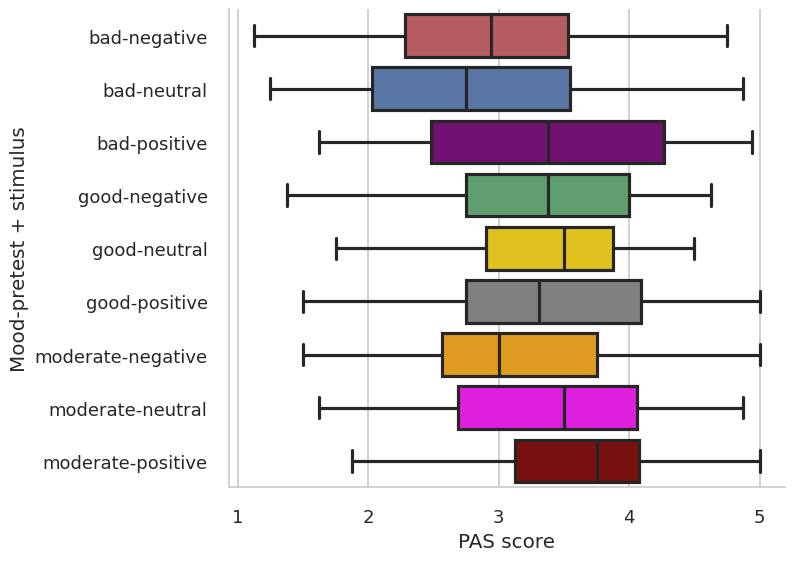

In [ ]:
g = sns.catplot(kind = 'box', data = df.sort_values(by = ['Nastroj1_3cat_komunikat']),
                y = 'Nastroj1_3cat_komunikat', x = 'wynik_ogólny', hue = 'Nastroj1_3cat_komunikat',
             aspect=1.4, height=5.8, dodge=False, legend=False,
                palette = ['r', 'b', 'purple', 'g', 'gold', 'grey', 'orange', 'magenta', 'darkred'])
g.set(xticks=[1,2,3,4,5], xlabel = 'PAS score', ylabel = 'Mood-pretest + stimulus')
plt.show()

In [ ]:
df['Nastroj2_3cat_komunikat'] = df.Nastroj2_3cat + "-" +\
                                 df.komunikat.map({0:'neutral', 1:'positive', 2:'negative'})

df['Nastroj2_3cat_komunikat'].value_counts()

bad-negative         60
moderate-neutral     58
good-positive        57
moderate-positive    52
moderate-negative    44
good-neutral         37
bad-neutral          36
good-negative        29
bad-positive         22
Name: Nastroj2_3cat_komunikat, dtype: int64

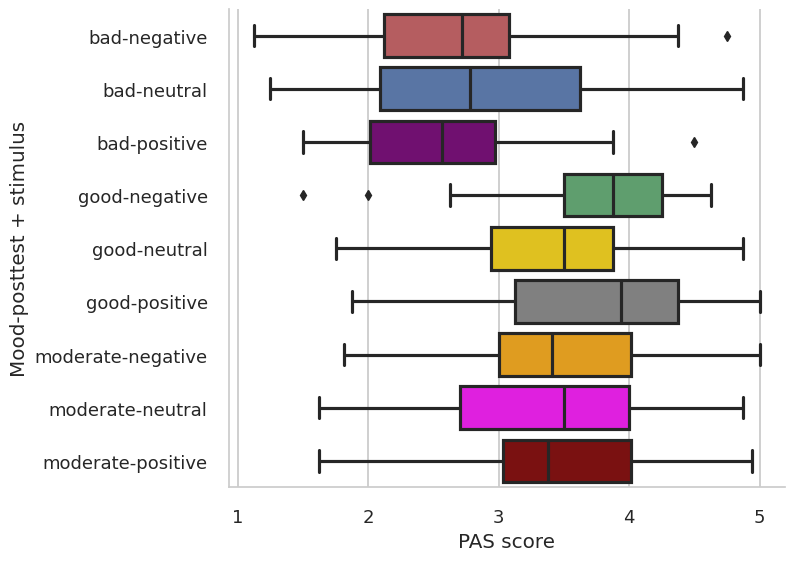

In [ ]:
g = sns.catplot(kind = 'box', data = df.sort_values(by = ['Nastroj2_3cat_komunikat']),
                y = 'Nastroj2_3cat_komunikat', x = 'wynik_ogólny', hue = 'Nastroj2_3cat_komunikat',
             aspect=1.4, height=5.8, dodge=False, legend=False,
                palette = ['r', 'b', 'purple', 'g', 'gold', 'grey', 'orange', 'magenta', 'darkred'])
g.set(xticks=[1,2,3,4,5], xlabel = 'PAS score', ylabel = 'Mood-posttest + stimulus')
plt.show()

In [ ]:
df.groupby(['Nastroj1_3cat_waznosc_3cat'])['wynik_ogólny'].mean().round(2).reset_index()#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,Nastroj1_3cat_waznosc_3cat,wynik_ogólny
0,bad_high,3.35
1,bad_low,2.43
2,bad_medium,3.15
3,good_high,3.45
4,good_low,2.99
5,good_medium,3.46
6,neutral_high,3.65
7,neutral_low,3.06
8,neutral_medium,3.16


In [211]:
df['waznosc_3cat_komunikat'] = df.waznosc_3cat.map({0:'medium', 1:'low', 2:'high'}) + "_" +\
                                 df.komunikat.map({0:'neutral', 1:'positive', 2:'negative'})

df['waznosc_3cat_komunikat'].value_counts()

low_negative       76
low_neutral        71
low_positive       52
high_positive      41
medium_positive    38
high_negative      32
medium_neutral     31
high_neutral       29
medium_negative    25
Name: waznosc_3cat_komunikat, dtype: int64

In [212]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['waznosc_3cat_komunikat'],
                          alpha=0.05)
  print(tukey)

wynik_ogólny
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
  high_negative    high_neutral   0.1735 0.9967 -0.4991  0.8461  False
  high_negative   high_positive   0.1883 0.9899 -0.4305   0.807  False
  high_negative    low_negative   0.6118 0.0177   0.059  1.1646   True
  high_negative     low_neutral   0.6721 0.0062  0.1136  1.2306   True
  high_negative    low_positive   1.1743    0.0  0.5849  1.7637   True
  high_negative medium_negative   0.4288 0.6072 -0.2715   1.129  False
  high_negative  medium_neutral   0.5978 0.1127 -0.0633  1.2589  False
  high_negative medium_positive   0.6151 0.0612 -0.0143  1.2445  False
   high_neutral   high_positive   0.0148    1.0 -0.6217  0.6513  False
   high_neutral    low_negative   0.4384 0.2934 -0.1342  1.0109  False
   high_neutral     low_neutral   0.4986 0.1546 -0.0795  1.0767 

In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['waznosc_3cat'],
                          alpha=0.05)
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0   0.2205 0.0986 -0.0307  0.4717  False
   0.0    2.0  -0.4348 0.0012 -0.7218 -0.1479   True
   1.0    2.0  -0.6553    0.0 -0.8997 -0.4109   True
----------------------------------------------------


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat'],
                          alpha=0.05)
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.1594 0.3155 -0.0989 0.4176  False
     0      2  -0.1139  0.551 -0.3712 0.1433  False
     1      2  -0.2733 0.0343 -0.5305 -0.016   True
---------------------------------------------------


#Other analyses

In [ ]:
df['tryb studiów'].unique()

array(['S', 'NS'], dtype=object)

In [ ]:
cols_pas = ['PAS 1', 'PAS 2', 'PAS 3', 'PAS 4', 'PAS 5',
       'PAS 6', 'PAS 7', 'PAS 8', 'PAS 9']

In [ ]:
df.to_csv('/content/exp-1st_res.csv', index=False)

In [ ]:
df['typ komunikatu'].value_counts()#.to_excel('/content/drive/MyDrive/temporal.xlsx')

neutralny    134
negatywny    133
pozytywny    132
Name: typ komunikatu, dtype: int64

In [ ]:
df.bon.value_counts()

0    199
1    196
Name: bon, dtype: int64

In [ ]:
pd.DataFrame(df.groupby('bon')['typ komunikatu'].value_counts())

typ komunikatu
bon typ komunikatu                
0   negatywny                   69
    neutralny                   65
    pozytywny                   65
1   neutralny                   66
    pozytywny                   66
    negatywny                   64

In [ ]:
df.płeć.value_counts(normalize=True).round(3)*100

k       78.4
m       19.3
inna     1.8
wnp      0.5
Name: płeć, dtype: float64

In [ ]:
df.płeć.value_counts()

k       313
m        77
inna      7
wnp       2
Name: płeć, dtype: int64

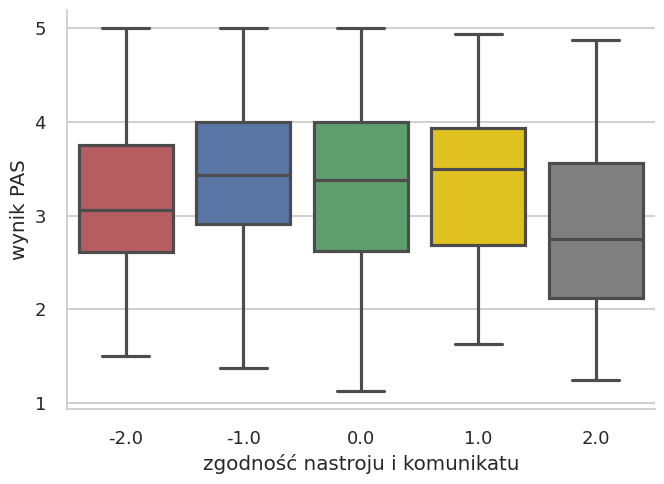

In [ ]:
g = sns.catplot(kind = 'box', data = df, x = 'Nastroj1_komunikat_congruence_3cat', y = 'wynik_ogólny', hue = 'Nastroj1_komunikat_congruence_3cat',
            palette = ['r', 'b', 'g', 'gold', 'grey'], aspect=1.4, dodge=False)
g.set(yticks=[1,2,3,4,5], ylabel = 'wynik PAS', xlabel = 'zgodność nastroju i komunikatu')
plt.show()

In [ ]:
#df.waznosc_3cat = df.waznosc_3cat.map({0:'neutral', 1:'high', 2:'low'})

df.waznosc_3cat = df.waznosc_3cat.map({0:'neutralna', 1:'wysoka', 2:'niska'})

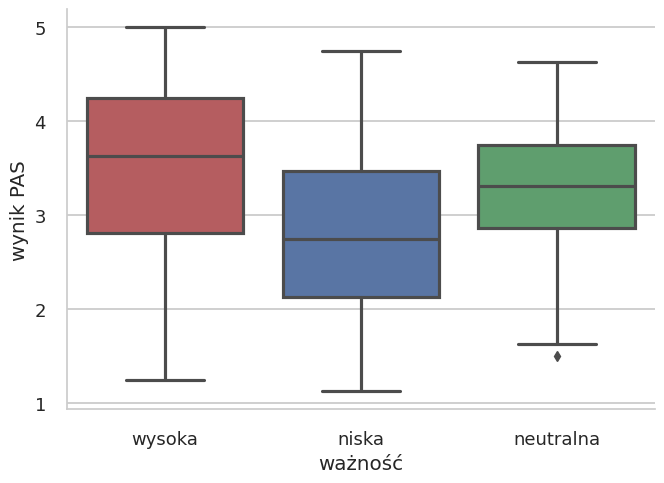

In [ ]:
g = sns.catplot(kind = 'box', data = df, x = 'waznosc_3cat', y = 'wynik_ogólny', hue = 'waznosc_3cat',
            palette = ['r', 'b', 'g'], aspect=1.4, dodge=False)
g.set(yticks=[1,2,3,4,5], ylabel = 'wynik PAS', xlabel = 'ważność')
plt.show()

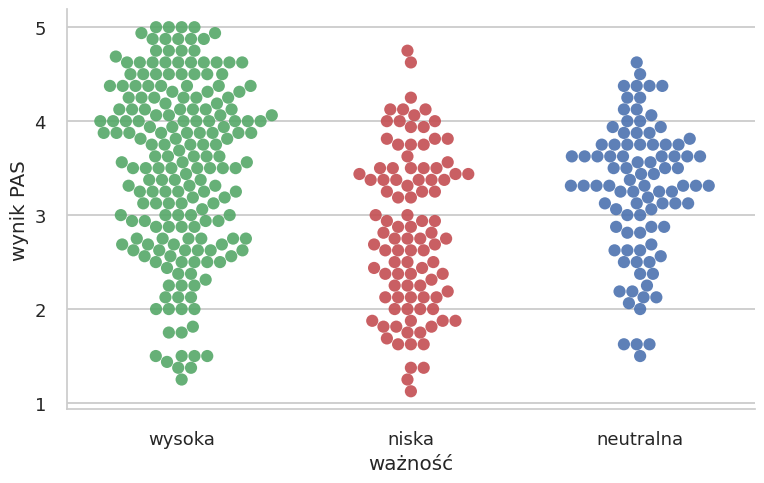

In [ ]:
g = sns.catplot(kind = 'swarm', data = df, x = 'waznosc_3cat', y = 'wynik_ogólny', hue = 'waznosc_3cat',
            palette = ['g', 'r', 'b'], s=77, alpha=0.9, aspect=1.6)
g.set(yticks=[1,2,3,4,5], ylabel = 'wynik PAS', xlabel = 'ważność')
plt.show()

In [ ]:
df['rok studiów'].value_counts()

1    203
4    196
Name: rok studiów, dtype: int64

In [ ]:
df['rok studiów'].value_counts(normalize=True).round(3)*100

1    50.9
4    49.1
Name: rok studiów, dtype: float64

In [ ]:
df.groupby('rok studiów')['osobista waznosc egzaminu'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
rok studiów,,,,,,,,
1,203.0,3.13,1.2,1.0,2.0,3.0,4.0,5.0
4,196.0,3.67,1.3,1.0,3.0,4.0,5.0,5.0


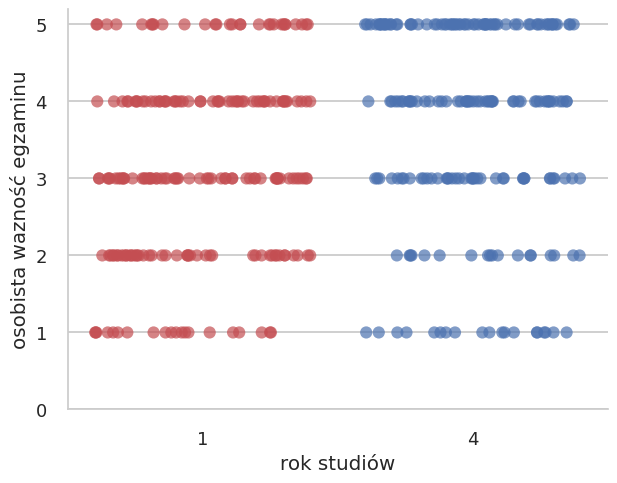

In [ ]:
g = sns.catplot(kind = 'strip', data = df, x = 'rok studiów', y = 'osobista waznosc egzaminu', hue = 'rok studiów',
            palette = ['r', 'b'], s=77, alpha=0.7, jitter = 0.4, aspect=1.3)
g.set(yticks=[0,1,2,3,4,5], ylabel = 'osobista wazność egzaminu')
plt.show()

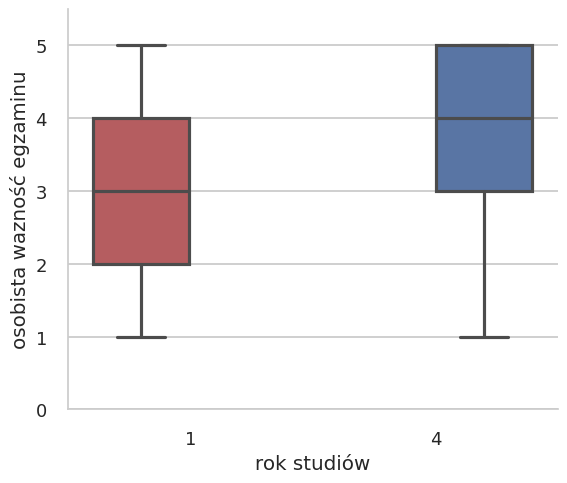

In [ ]:
g = sns.catplot(kind = 'box', data = df, x = 'rok studiów', y = 'osobista waznosc egzaminu', hue = 'rok studiów',
            palette = ['r', 'b'], aspect=1.2)
g.set(yticks=[0,1,2,3,4,5], ylabel = 'osobista wazność egzaminu', ylim=(0,5.5))
plt.show()

In [ ]:
df.columns

Index(['kod osoby', 'typ komunikatu', 'bon', 'płeć', 'wiek', 'tryb studiów',
       'rok studiów', 'osobista waznosc egzaminu', 'Nastroj 1', 'Nastroj 2',
       'PAS 1', 'PAS 2', 'PAS 3', 'PAS 4', 'PAS 5', 'PAS 6', 'PAS 7', 'PAS 8',
       'PAS 9', 'indeks przychylności', 'wynik ogólny', 'nastroj_diff'],
      dtype='object')

In [ ]:
df[df['wynik ogólny'] > 5]

,kod osoby,typ komunikatu,bon,płeć,wiek,tryb studiów,rok studiów,osobista waznosc egzaminu,Nastroj 1,Nastroj 2,PAS 1,PAS 2,PAS 3,PAS 4,PAS 5,PAS 6,PAS 7,PAS 8,PAS 9,indeks przychylności,wynik ogólny,nastroj_diff
18,KJA09,neutralny,1,k,41,NS,1,3,5,5,3,3,5,1,99,3,3,3,4,3.0,15.125,0
147,XX60,neutralny,0,k,20,S,1,5,4,4,5,5,5,3,99,5,1,4,5,5.0,16.375,0
356,X204,neutralny,0,k,26,NS,4,5,1,1,1,1,1,1,99,1,5,1,1,1.0,13.250,0


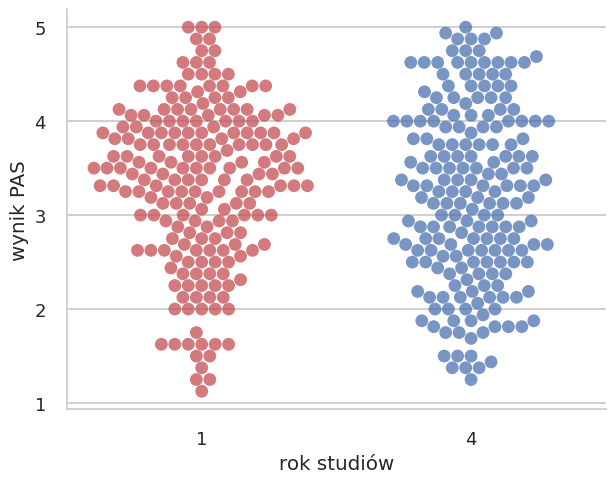

In [ ]:
g = sns.catplot(kind = 'swarm', data = df[df['wynik ogólny'] < 6], x = 'rok studiów', y = 'wynik ogólny', hue = 'rok studiów',
            palette = ['r', 'b'], s=85, alpha=0.75, aspect=1.3)
g.set(yticks=[1,2,3,4,5], ylabel = 'wynik PAS')
plt.show()

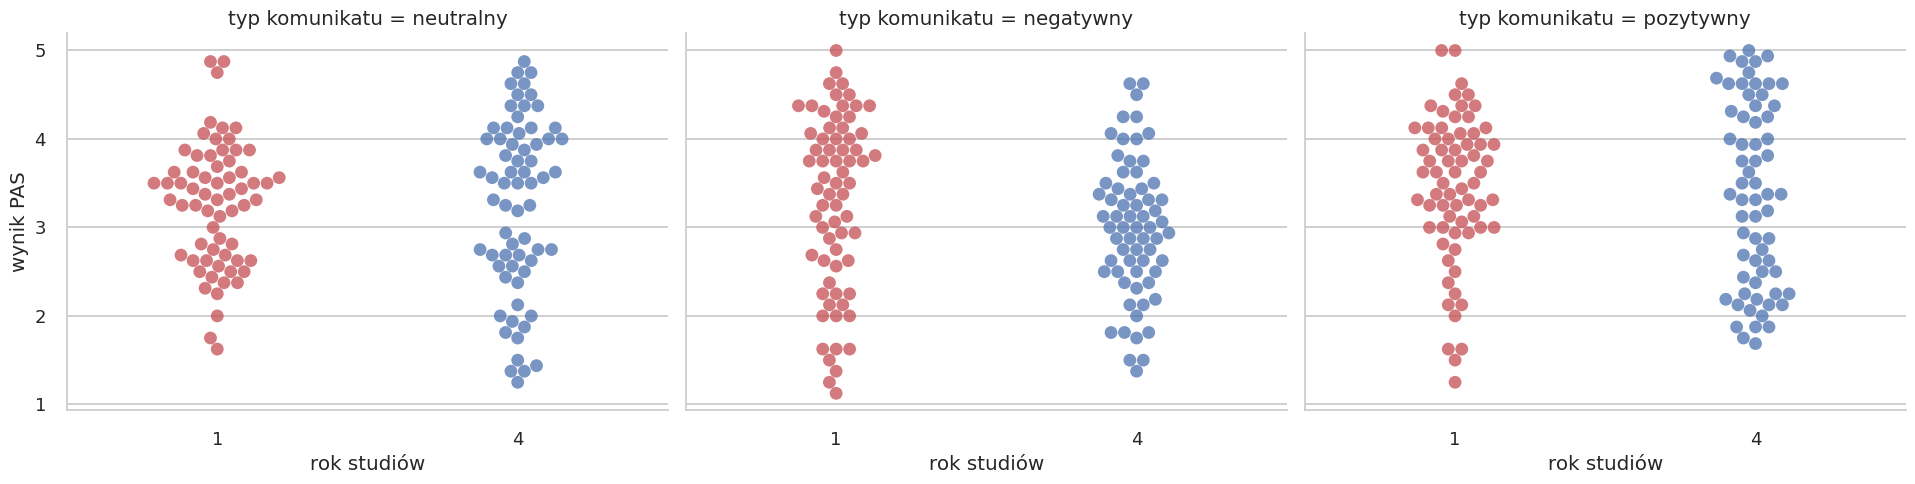

In [ ]:
g = sns.catplot(kind = 'swarm', data = df[df['wynik ogólny'] < 6], x = 'rok studiów', y = 'wynik ogólny', hue = 'rok studiów',
            palette = ['r', 'b'], s=85, alpha=0.75, aspect=1.3, col = 'typ komunikatu', dodge=False)
g.set(yticks=[1,2,3,4,5], ylabel = 'wynik PAS')
plt.show()

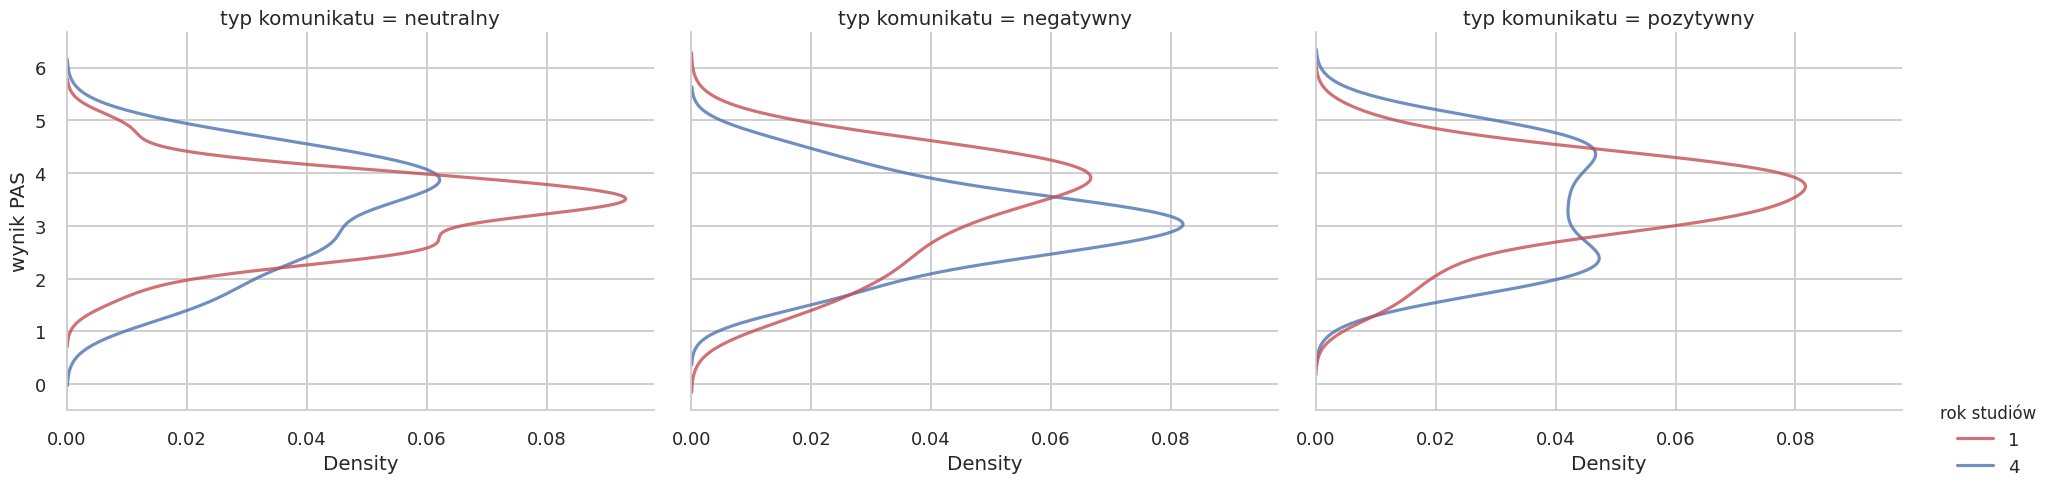

In [ ]:
g = sns.displot(data = df[df['wynik ogólny'] < 6], y = 'wynik ogólny', hue = 'rok studiów',
            palette = ['r', 'b'], alpha = 0.8, kind="kde", aspect=1.3, col = 'typ komunikatu')
g.set(ylabel = 'wynik PAS')
sns.move_legend(g, loc = 'lower right')
plt.show()

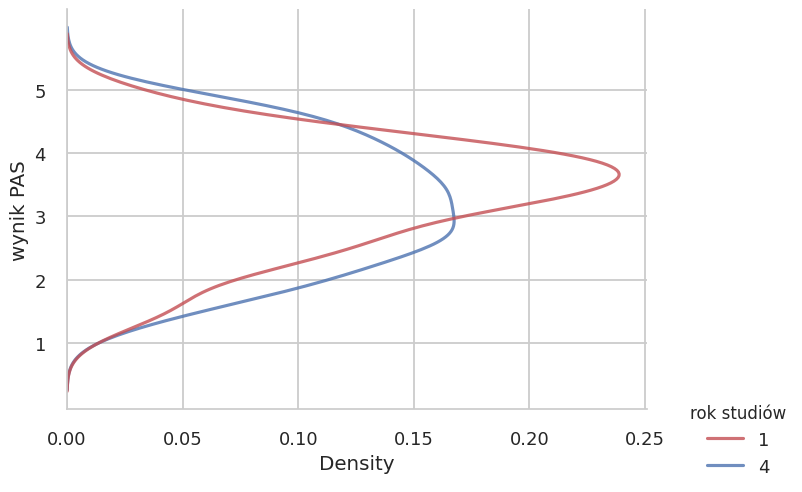

In [ ]:
g = sns.displot(data = df[df['wynik ogólny'] < 6], y = 'wynik ogólny', hue = 'rok studiów',
            palette = ['r', 'b'], alpha = 0.8, kind="kde", aspect=1.4)
g.set(yticks=[1,2,3,4,5], ylabel = 'wynik PAS')
sns.move_legend(g, loc = 'lower right')
plt.show()

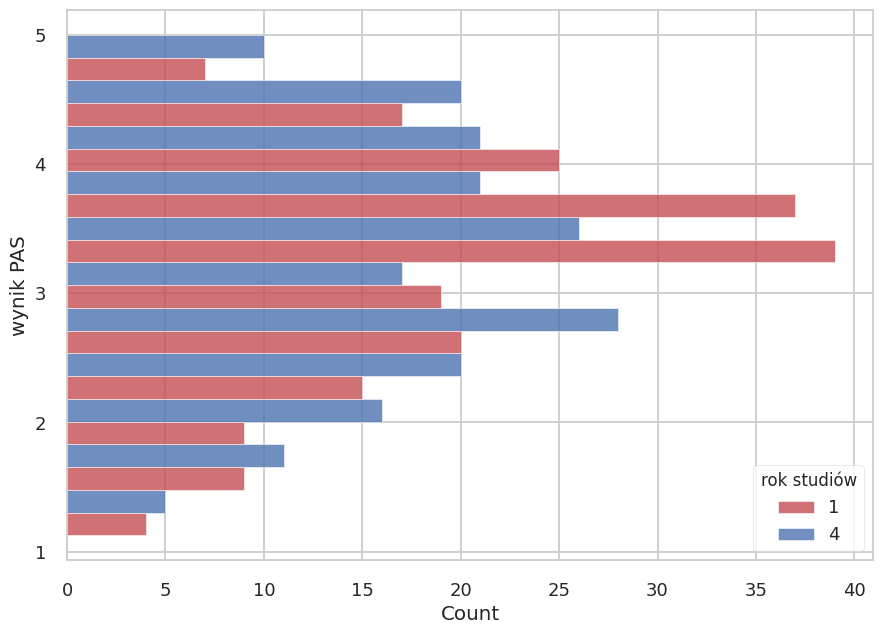

In [ ]:
g = sns.histplot(data = df[df['wynik ogólny'] < 6], y = 'wynik ogólny', hue = 'rok studiów',
            palette = ['r', 'b'], multiple="dodge", alpha = 0.8,)
g.set(yticks=[1,2,3,4,5], ylabel = 'wynik PAS')
sns.move_legend(g, loc = 'lower right')
plt.show()

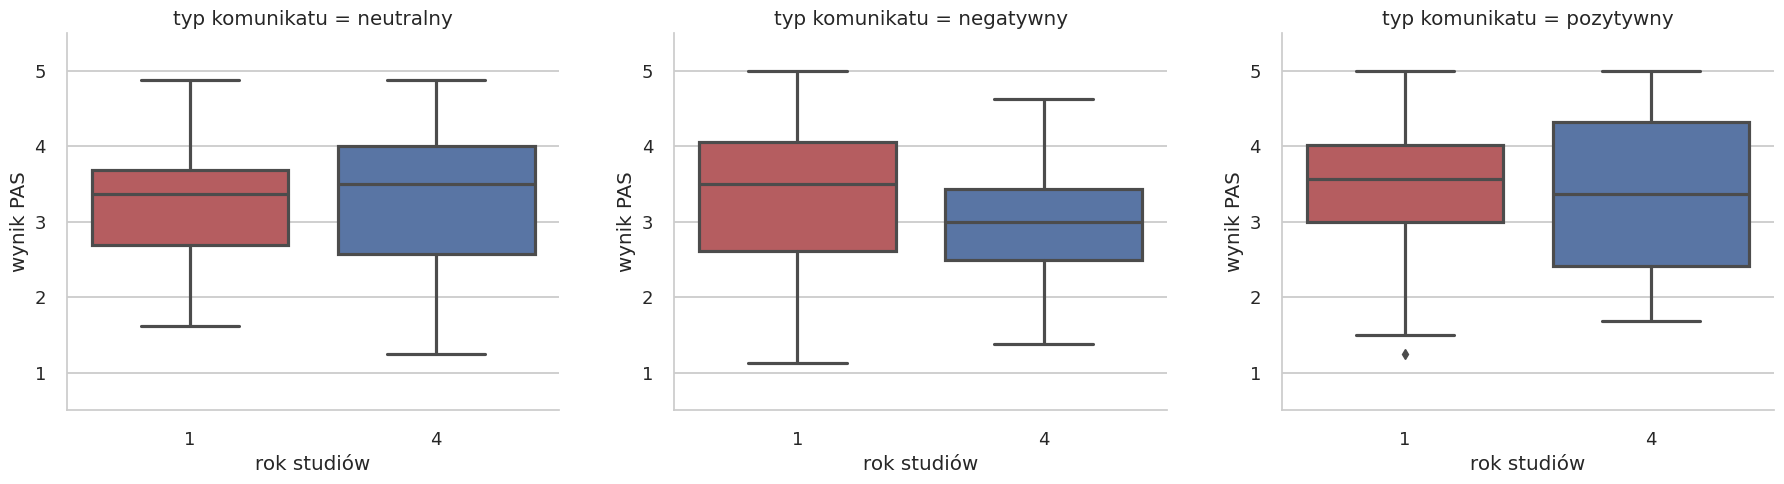

In [ ]:
g = sns.catplot(kind = 'box', data = df[df['wynik ogólny'] < 6], x = 'rok studiów', y = 'wynik ogólny', hue = 'rok studiów',
            palette = ['r', 'b'], aspect=1.2, col = 'typ komunikatu', sharey=False, dodge=False)
g.set(yticks=[1,2,3,4,5], ylabel = 'wynik PAS', ylim=(0.5,5.5))
plt.tight_layout(w_pad=3.5)
plt.show()

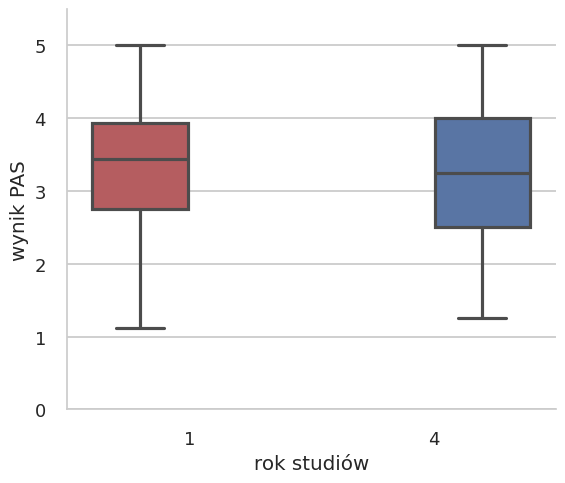

In [ ]:
g = sns.catplot(kind = 'box', data = df[df['wynik ogólny'] < 6], x = 'rok studiów', y = 'wynik ogólny', hue = 'rok studiów',
            palette = ['r', 'b'], aspect=1.2)
g.set(yticks=[0,1,2,3,4,5], ylabel = 'wynik PAS', ylim=(0,5.5))
plt.show()

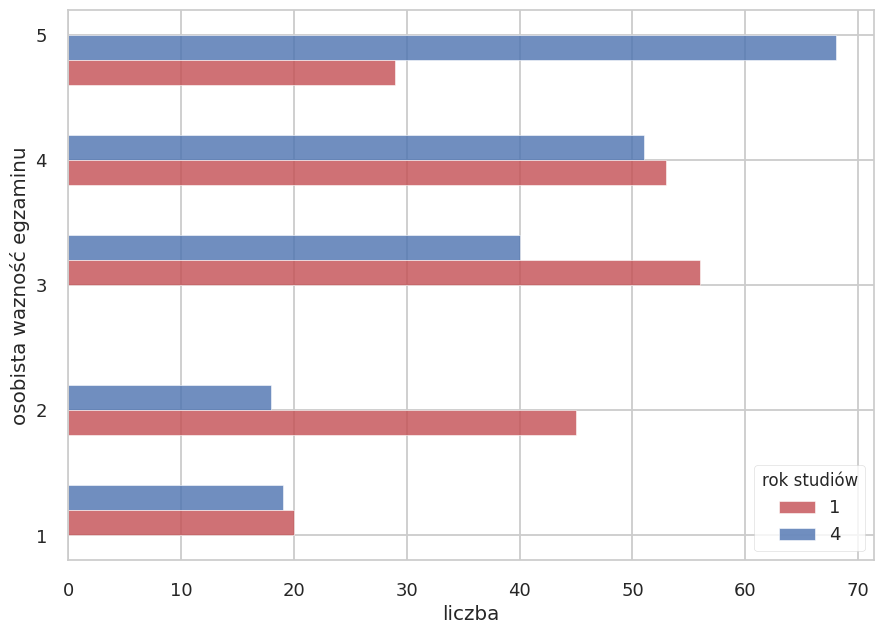

In [ ]:
g = sns.histplot(data = df, y = 'osobista waznosc egzaminu', hue = 'rok studiów',
            palette = ['r', 'b'], multiple="dodge", alpha = 0.8,)
g.set(yticks=[1,2,3,4,5], ylabel = 'osobista wazność egzaminu', xlabel = 'liczba')
sns.move_legend(g, loc = 'lower right')
plt.show()

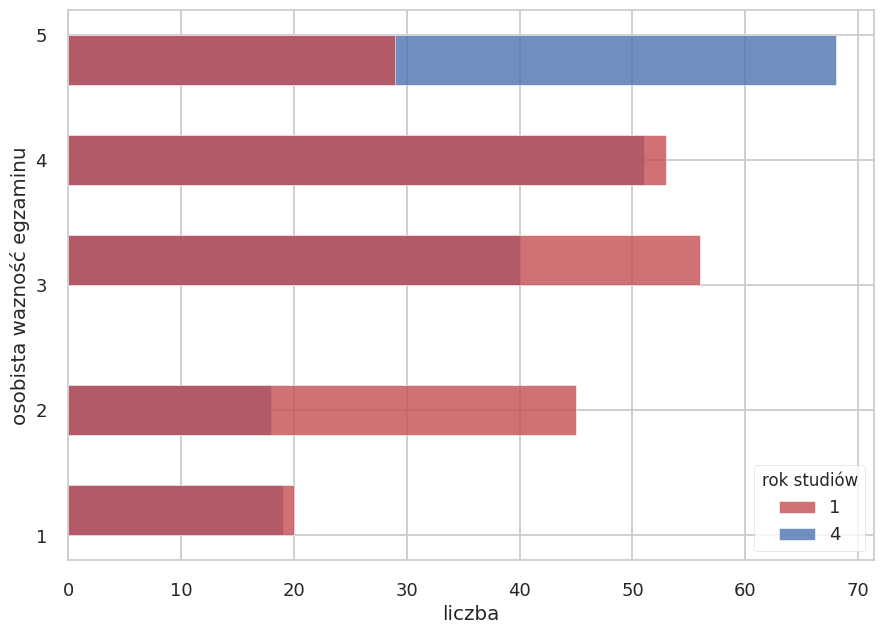

In [ ]:
g = sns.histplot(data = df, y = 'osobista waznosc egzaminu', hue = 'rok studiów',
            palette = ['r', 'b'], multiple="layer", alpha = 0.8,)
g.set(yticks=[1,2,3,4,5], ylabel = 'osobista wazność egzaminu', xlabel = 'liczba')
sns.move_legend(g, loc = 'lower right')
plt.show()

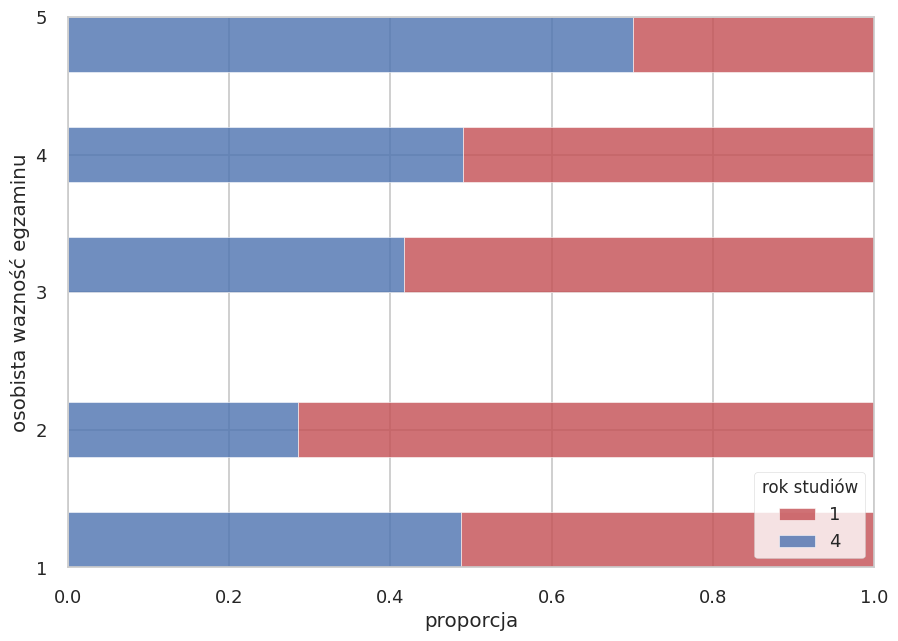

In [ ]:
g = sns.histplot(data = df, y = 'osobista waznosc egzaminu', hue = 'rok studiów',
            palette = ['r', 'b'], multiple="fill", alpha = 0.8,)
g.set(yticks=[1,2,3,4,5], ylabel = 'osobista wazność egzaminu', xlabel = 'proporcja')
sns.move_legend(g, loc = 'lower right')
plt.show()

In [ ]:
g = sns.histplot(data = df, y = 'osobista waznosc egzaminu', hue = 'rok studiów',
            palette = ['r', 'b'], multiple="dodge", alpha = 0.8,)
#g.set(yticks=[0,1,2,3,4,5], ylabel = 'osobista wazność egzaminu', ylim=(0,5.5))
plt.show()

In [ ]:
df['tryb studiów'].value_counts()

NS    202
S     197
Name: tryb studiów, dtype: int64

In [ ]:
df['osobista waznosc egzaminu'].describe().round(2)

count    399.00
mean       3.63
std        4.95
min        1.00
25%        2.00
50%        4.00
75%        4.00
max       99.00
Name: osobista waznosc egzaminu, dtype: float64

In [ ]:
df.wiek.describe().round(2)

count    399.00
mean      23.67
std        7.46
min       18.00
25%       20.00
50%       22.00
75%       24.00
max       99.00
Name: wiek, dtype: float64

In [ ]:
df['Nastroj 1'].describe().round(2)

count    399.00
mean       3.07
std        1.00
min        1.00
25%        2.00
50%        3.00
75%        4.00
max        5.00
Name: Nastroj 1, dtype: float64

In [ ]:
df['Nastroj 2'].describe().round(2)

count    399.00
mean       2.99
std        1.00
min        1.00
25%        2.00
50%        3.00
75%        4.00
max        5.00
Name: Nastroj 2, dtype: float64

In [ ]:
df.groupby(['płeć'])['Nastroj 1'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
płeć,,,,,,,,
inna,7.0,3.29,0.76,2.0,3.00,3.0,4.00,4.0
k,313.0,3.03,1.02,1.0,2.00,3.0,4.00,5.0
m,77.0,3.23,0.94,1.0,3.00,3.0,4.00,5.0
wnp,2.0,2.50,2.12,1.0,1.75,2.5,3.25,4.0


In [ ]:
df.groupby(['płeć'])['typ komunikatu'].value_counts()

płeć  typ komunikatu
inna  negatywny           4
      neutralny           2
      pozytywny           1
k     neutralny         110
      negatywny         103
      pozytywny         100
m     pozytywny          31
      negatywny          24
      neutralny          22
wnp   negatywny           2
Name: typ komunikatu, dtype: int64

In [ ]:
df.groupby( ['typ komunikatu'] ).płeć.value_counts()

typ komunikatu  płeć
negatywny       k       103
                m        24
                inna      4
                wnp       2
neutralny       k       110
                m        22
                inna      2
pozytywny       k       100
                m        31
                inna      1
Name: płeć, dtype: int64

In [ ]:
df.groupby(['typ komunikatu'])['Nastroj 2'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
typ komunikatu,,,,,,,,
negatywny,133.0,2.72,1.03,1.0,2.0,3.0,3.0,5.0
neutralny,134.0,2.94,0.96,1.0,2.0,3.0,4.0,5.0
pozytywny,132.0,3.30,0.94,1.0,3.0,3.0,4.0,5.0


In [ ]:
df[df['wynik ogólny'] > 5]['indeks przychylności'].describe().round(2)

count    3.0
mean     3.0
std      2.0
min      1.0
25%      2.0
50%      3.0
75%      4.0
max      5.0
Name: indeks przychylności, dtype: float64

In [ ]:
df[df['wynik ogólny'] > 5]['wynik ogólny'].describe().round(2)

count     3.00
mean     14.92
std       1.57
min      13.25
25%      14.19
50%      15.12
75%      15.75
max      16.38
Name: wynik ogólny, dtype: float64

In [ ]:
df['typ komunikatu'].unique()

array(['neutralny', 'negatywny', 'pozytywny'], dtype=object)

##kolumny

In [21]:
p3_pos = df[ df['komunikat'] == 1]
p3_neu = df[ df['komunikat'] == 0]
p3_neg = df[ df['komunikat'] == 2]

In [126]:
dyfer_przed = {'Nastroj1'}

dyfer_po = {'Nastroj2'}

cc = [('Nastroj1', 'Nastroj2')]

##t-test



###bon

In [12]:
df.groupby(['bon'])['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny'].mean().round(2).reset_index()#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,bon,Nastroj1,Nastroj2,nastroj_diff,wynik_ogólny
0,0,3.00,2.91,-0.09,3.31
1,1,3.13,3.06,-0.07,3.25


In [ ]:
#mannwhitneyu


for d in ['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  p1 = df[df.bon == 0][d].values
  p2 = df[df.bon == 1][d].values
  print(d)

  value, p = mannwhitneyu(p1, p2) # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")

    print('t: ', value.round(3), 'p-value: ', p.round(4), "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

Nastroj1
do NOT reject H0
17946.0 0.1514 

Nastroj2
do NOT reject H0
17510.0 0.0659 

nastroj_diff
do NOT reject H0
19346.0 0.8751 

wynik_ogólny
do NOT reject H0
20273.0 0.4969 



In [ ]:

for d in ['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  p1 = df[df.bon == 0][d].values
  p2 = df[df.bon == 1][d].values
  print(d)

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

Nastroj1
do NOT reject H0
-1.2726502536733204 0.2039 

Nastroj2
do NOT reject H0
-1.4644468836893578 0.1439 

nastroj_diff
do NOT reject H0
-0.224210387720696 0.8227 

wynik_ogólny
do NOT reject H0
0.6885550183474333 0.4915 



In [ ]:
for c in ['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['bon'],
                          alpha=0.05)
  #display results
  print(tukey)

Nastroj1
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.1276 0.2039 -0.0695 0.3246  False
---------------------------------------------------
Nastroj2
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.1466 0.1439 -0.0502 0.3434  False
---------------------------------------------------
nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1    0.019 0.8227 -0.1478 0.1858  False
---------------------------------------------------
wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.06

In [88]:
for c in ['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[df['płeć'].isin([1,2])][c],
                          groups = df[df['płeć'].isin([1,2])]['płeć'],
                          alpha=0.05)
  #display results
  print(tukey)

Nastroj1
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.2143 0.0914 -0.0347 0.4634  False
---------------------------------------------------
Nastroj2
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     1      2   0.3926 0.002 0.1446 0.6405   True
-------------------------------------------------
nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.1782 0.0971 -0.0325 0.3889  False
---------------------------------------------------
wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2    0.199 0.080

In [13]:
for d in ['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  p1 = df[ (df.bon == 0) & (df.płeć == 1) ][d].values
  p2 = df[ (df.bon == 1) & (df.płeć == 1) ][d].values
  print(d)

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

Nastroj1
do NOT reject H0
-1.0210006810568617 0.3081 

Nastroj2
do NOT reject H0
-1.0510551347546973 0.2941 

nastroj_diff
do NOT reject H0
-0.04426417548161178 0.9647 

wynik_ogólny
do NOT reject H0
0.8584212540727312 0.3913 



In [14]:
for d in ['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  p1 = df[ (df.bon == 0) & (df.płeć == 2) ][d].values
  p2 = df[ (df.bon == 1) & (df.płeć == 2) ][d].values
  print(d)

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

Nastroj1
do NOT reject H0
-0.2679029102363685 0.7895 

Nastroj2
do NOT reject H0
-0.6764990808250534 0.5008 

nastroj_diff
do NOT reject H0
-0.42546945998113334 0.6717 

wynik_ogólny
do NOT reject H0
0.6703100637330884 0.5047 



In [ ]:
for d in ['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  p1 = df[ (df.bon == 0) & (df.płeć == 1) ][d].values
  p2 = df[ (df.bon == 0) & (df.płeć == 2) ][d].values
  print(d)

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

Nastroj1
do NOT reject H0
-1.4006394227719123 0.1629 

Nastroj2
reject H0
t:  -2.229 p-value:  0.0269 effect size:  -0.4 

nastroj_diff
do NOT reject H0
-0.8627390828631805 0.3894 

wynik_ogólny
do NOT reject H0
-1.2719663114059616 0.2049 



In [ ]:
for d in ['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  p1 = df[ (df.bon == 1) & (df.płeć == 1) ][d].values
  p2 = df[ (df.bon == 1) & (df.płeć == 2) ][d].values
  print(d)

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

Nastroj1
do NOT reject H0
-0.9997240130235726 0.3187 

Nastroj2
reject H0
t:  -2.175 p-value:  0.0309 effect size:  -0.39 

nastroj_diff
do NOT reject H0
-1.5599225543001665 0.1205 

wynik_ogólny
do NOT reject H0
-1.1993319953499033 0.2319 



In [ ]:
for d in ['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  p1 = df[ (df.bon == 1) & (df.płeć == 1) ][d].values
  p2 = df[ (df.bon == 0) & (df.płeć == 2) ][d].values
  print(d)

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

Nastroj1
do NOT reject H0
-0.6859951432250676 0.4936 

Nastroj2
do NOT reject H0
-1.4252252916018504 0.1557 

nastroj_diff
do NOT reject H0
-0.9213484946643352 0.358 

wynik_ogólny
do NOT reject H0
-1.9236098573711755 0.0559 



In [ ]:
for d in ['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  p1 = df[ (df.bon == 0) & (df.płeć == 1) ][d].values
  p2 = df[ (df.bon == 1) & (df.płeć == 2) ][d].values
  print(d)

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

Nastroj1
do NOT reject H0
-1.7358321375617711 0.0842 

Nastroj2
reject H0
t:  -3.04 p-value:  0.0027 effect size:  -0.55 

nastroj_diff
do NOT reject H0
-1.420764409820166 0.157 

wynik_ogólny
do NOT reject H0
-0.571789197874758 0.5681 



In [89]:
df['komunikat_bon'] = df.komunikat.astype('str')+'_'+df.bon.astype('str')
df['komunikat_bon'].value_counts()

2_0    69
0_1    66
1_1    66
1_0    65
0_0    65
2_1    64
Name: komunikat_bon, dtype: int64

In [15]:
df.groupby('komunikat').Nastroj2.mean().round(2)

komunikat
0    2.93
1    3.30
2    2.72
Name: Nastroj2, dtype: float64

In [16]:
df.groupby('bon').Nastroj2.mean().round(2)

bon
0    2.91
1    3.06
Name: Nastroj2, dtype: float64

 0    145
 1     84
-1     74
 2     52
-2     40
Name: Nastroj1_komunikat_congruence, dtype: int64

In [204]:
df['Nastroj1_komunikat_congruence_komunikat'] = df.Nastroj1_komunikat_congruence.astype('str') + "_" + df.komunikat.map({0:'neutral', 1:'positive', 2:'negative'})
df['Nastroj1_komunikat_congruence_komunikat'].value_counts()

0_neutral      58
2_negative     52
0_positive     51
1_negative     45
-2_positive    40
-1_positive    40
1_neutral      39
0_negative     36
-1_neutral     34
Name: Nastroj1_komunikat_congruence_komunikat, dtype: int64

In [205]:
##
for dep in {'wynik_ogólny'}:
  print(dep)
  model = ols(f"""{dep} ~ C(nastroj_diff)+C(komunikat)+C(waznosc)+C(bon)+C(Nastroj1)+C(Nastroj1_komunikat_congruence)+\
            C(Nastroj1_komunikat_congruence_komunikat)""",
              data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

wynik_ogólny
                                              sum_sq     df        F  PR(>F)
C(nastroj_diff)                              63.2539    7.0  17.2860  0.0000
C(komunikat)                                  4.8224    2.0   4.6125  0.0105
C(waznosc)                                   29.4150    4.0  14.0674  0.0000
C(bon)                                        0.9707    1.0   1.8570  0.1738
C(Nastroj1)                                  19.4241    4.0   9.2894  0.0000
C(Nastroj1_komunikat_congruence)             21.3851    4.0  10.2272  0.0000
C(Nastroj1_komunikat_congruence_komunikat)   23.8992    8.0   5.7148  0.0000
Residual                                    194.4629  372.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           wynik_ogólny   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:     

In [203]:
for c in ['wynik_ogólny']:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat'],
                          alpha=0.05)
  #Participants with a negative stimulus achieve significantly lower PAS score than participants with a positive stimulus.
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.1594 0.3155 -0.0989 0.4176  False
     0      2  -0.1139  0.551 -0.3712 0.1433  False
     1      2  -0.2733 0.0343 -0.5305 -0.016   True
---------------------------------------------------


In [206]:
for c in ['wynik_ogólny']:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_komunikat_congruence_komunikat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
 -1_neutral -1_positive   0.7482 0.0086  0.1108 1.3855   True
 -1_neutral -2_positive   0.5091 0.2392 -0.1282 1.1464  False
 -1_neutral  0_negative   0.1475 0.9987 -0.5059 0.8009  False
 -1_neutral   0_neutral   0.6598 0.0158  0.0696   1.25   True
 -1_neutral  0_positive   0.5754 0.0768 -0.0296 1.1803  False
 -1_neutral  1_negative   0.3204 0.7992 -0.3005 0.9412  False
 -1_neutral   1_neutral   0.5254 0.2088 -0.1157 1.1665  False
 -1_neutral  2_negative   0.4765 0.2516 -0.1261 1.0791  False
-1_positive -2_positive  -0.2391 0.9517   -0.85 0.3719  False
-1_positive  0_negative  -0.6007 0.0731 -1.2284  0.027  False
-1_positive   0_neutral  -0.0884 0.9999 -0.6499 0.4732  False
-1_positive  0_positive  -0.1728 0.9909 -0.7499 0.4043  False
-1_positive  1_negative  -0.4278 0.3772 -1.0215  0.166  F

In [207]:
tt = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
tt.head()

,group1,group2,meandiff,p-adj,lower,upper,reject
0,-1_neutral,-1_positive,0.7482,0.0086,0.1108,1.3855,True
1,-1_neutral,-2_positive,0.5091,0.2392,-0.1282,1.1464,False
2,-1_neutral,0_negative,0.1475,0.9987,-0.5059,0.8009,False
3,-1_neutral,0_neutral,0.6598,0.0158,0.0696,1.2500,True
4,-1_neutral,0_positive,0.5754,0.0768,-0.0296,1.1803,False


In [209]:
tt[tt.reject == True].to_excel('/content/drive/MyDrive/temporal.xlsx')

In [200]:
for c in ['wynik_ogólny']:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['nastroj_diff'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    -3     -2   1.1399 0.8806 -1.4416 3.7214  False
    -3     -1   1.3069 0.7694  -1.234 3.8478  False
    -3      0   1.8338 0.3472 -0.6935 4.3612  False
    -3      1   2.2934  0.113 -0.2544 4.8411  False
    -3      2   2.5573 0.0624 -0.0678 5.1824  False
    -3      3     1.25  0.963 -2.3168 4.8168  False
    -3      4    0.625 0.9995 -2.9418 4.1918  False
    -2     -1    0.167 0.9927 -0.4637 0.7978  False
    -2      0    0.694 0.0063  0.1203 1.2676   True
    -2      1   1.1535    0.0  0.4957 1.8113   True
    -2      2   1.4174 0.0001  0.5047 2.3301   True
    -2      3   0.1101    1.0 -2.4714 2.6916  False
    -2      4  -0.5149 0.9988 -3.0964 2.0666  False
    -1      0   0.5269 0.0001  0.1789  0.875   True
    -1      1   0.9865    0.0  0.5124 1.4606   True
    -1      2   1.2504 0.0001  0.4598  2.041   True

In [199]:
for c in ['wynik_ogólny']:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['waznosc'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.4112  0.122 -0.0616 0.8841  False
     1      3   0.6888 0.0002  0.2468 1.1309   True
     1      4   0.8231    0.0  0.3874 1.2589   True
     1      5   1.0037    0.0  0.5623  1.445   True
     2      3   0.2776 0.2614 -0.1003 0.6555  False
     2      4   0.4119 0.0208  0.0414 0.7824   True
     2      5   0.5924 0.0002  0.2154 0.9695   True
     3      4   0.1343  0.799  -0.196 0.4645  False
     3      5   0.3148 0.0808 -0.0228 0.6524  False
     4      5   0.1806 0.5615 -0.1488 0.5099  False
---------------------------------------------------


In [198]:
for c in ['wynik_ogólny']:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2    0.413 0.2151 -0.1218 0.9478  False
     1      3   0.6559 0.0039  0.1495 1.1624   True
     1      4   0.5948 0.0139  0.0815 1.1082   True
     1      5   0.6576 0.0859 -0.0545 1.3697  False
     2      3   0.2429 0.2684 -0.0901  0.576  False
     2      4   0.1818 0.5949 -0.1616 0.5253  False
     2      5   0.2447 0.7985 -0.3566 0.8459  False
     3      4  -0.0611 0.9803 -0.3586 0.2364  False
     3      5   0.0017    1.0 -0.5745 0.5779  False
     4      5   0.0628 0.9983 -0.5195 0.6451  False
---------------------------------------------------


In [100]:
for dep in ['Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  print(dep)
  model = ols(f"""{dep} ~ C(płeć)+C(bon)+C(komunikat)+C(komunikat):C(płeć)+C(komunikat):C(bon)+C(płeć):C(komunikat):C(bon)""",
              data = df[df.płeć.isin([1,2])]).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************\n ')

Nastroj2
                               sum_sq     df        F  PR(>F)
C(płeć)                        7.2658    1.0   8.0856  0.0047
C(bon)                         1.3081    1.0   1.4557  0.2284
C(komunikat)                  21.1569    2.0  11.7720  0.0000
C(komunikat):C(płeć)           0.9712    2.0   0.5404  0.5830
C(komunikat):C(bon)           11.3701    2.0   6.3265  0.0020
C(płeć):C(komunikat):C(bon)    5.3348    3.0   1.9789  0.1167
Residual                     336.0808  374.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:               Nastroj2   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     5.041
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           2.39e-07
Time:                        14:08:35   Log-Likelihood:                -520.98
No. Observations:    

In [109]:
df.groupby(['komunikat'])['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny'].mean().round(2).reset_index()

,komunikat,Nastroj1,Nastroj2,nastroj_diff,wynik_ogólny
0,0,2.98,2.93,-0.05,3.26
1,1,3.08,3.30,0.22,3.42
2,2,3.14,2.72,-0.41,3.15


In [106]:
df.groupby(['komunikat_bon'])['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny'].mean().round(2).reset_index()

,komunikat_bon,Nastroj1,Nastroj2,nastroj_diff,wynik_ogólny
0,0_0,3.00,2.91,-0.09,3.39
1,0_1,2.95,2.95,0.00,3.14
2,1_0,2.94,3.43,0.49,3.58
3,1_1,3.21,3.17,-0.05,3.26
4,2_0,3.06,2.42,-0.64,2.97
5,2_1,3.22,3.05,-0.17,3.34


In [111]:
for c in ['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[df.płeć.isin([1,2])][c],
                          groups = df[df.płeć.isin([1,2])]['płeć'],
                          alpha=0.05)
  print(tukey)
  print('\n*****************************************************\n')

  # not all True results are an indication of interaction - some are just effects of stimulus

Nastroj1
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.2143 0.0914 -0.0347 0.4634  False
---------------------------------------------------

*****************************************************

Nastroj2
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     1      2   0.3926 0.002 0.1446 0.6405   True
-------------------------------------------------

*****************************************************

nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.1782 0.0971 -0.0325 0.3889  False
---------------------------------------------------

*****************************************************

wynik_ogólny
Multiple Compari

In [108]:
for c in ['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat_bon'],
                          alpha=0.05)
  #display results
  print(tukey)
  print('\n*****************************************************\n')
  # not all True results are an indication of interaction - some are just effects of stimulus

Nastroj1
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   0_0    0_1  -0.0455 0.9998 -0.5442 0.4533  False
   0_0    1_0  -0.0615 0.9993 -0.5622 0.4391  False
   0_0    1_1   0.2121 0.8279 -0.2866 0.7109  False
   0_0    2_0    0.058 0.9994 -0.4354 0.5513  False
   0_0    2_1   0.2188 0.8136 -0.2839 0.7214  False
   0_1    1_0  -0.0161    1.0 -0.5148 0.4827  False
   0_1    1_1   0.2576 0.6743 -0.2393 0.7544  False
   0_1    2_0   0.1034 0.9908  -0.388 0.5949  False
   0_1    2_1   0.2642 0.6573 -0.2365 0.7649  False
   1_0    1_1   0.2737  0.618 -0.2251 0.7724  False
   1_0    2_0   0.1195 0.9826 -0.3738 0.6129  False
   1_0    2_1   0.2803  0.601 -0.2223 0.7829  False
   1_1    2_0  -0.1542 0.9468 -0.6456 0.3373  False
   1_1    2_1   0.0066    1.0 -0.4941 0.5074  False
   2_0    2_1   0.1608 0.9387 -0.3346 0.6561  False
---------------------------------------------------

**

###rok/tryb/płeć - waznosc

In [114]:
df.groupby('rok').waznosc.mean().round(2).reset_index()

,rok,waznosc
0,1,3.12
1,4,3.66


In [112]:
df.groupby('rok')['Nastroj1', 'Nastroj2', 'wynik_ogólny'].mean().round(2).reset_index()

,rok,Nastroj1,Nastroj2,wynik_ogólny
0,1,3.30,3.22,3.34
1,4,2.82,2.74,3.21


In [113]:
for d in ['waznosc', 'Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  p1 = df[df.rok == 4][d].values
  p2 = df[df.rok == 1][d].values
  print(d)

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

waznosc
reject H0
t:  4.302 p-value:  0.0 effect size:  0.43 

Nastroj1
reject H0
t:  -4.919 p-value:  0.0 effect size:  -0.5 

Nastroj2
reject H0
t:  -4.945 p-value:  0.0 effect size:  -0.5 

nastroj_diff
do NOT reject H0
-0.024173338314852296 0.9807 

wynik_ogólny
do NOT reject H0
-1.4840168474064361 0.1386 



In [115]:
df.groupby('rok').waznosc.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
rok,,,,,,,,
1,200.0,3.12,1.2,1.0,2.0,3.0,4.0,5.0
4,195.0,3.66,1.3,1.0,3.0,4.0,5.0,5.0


In [116]:
for d in ['waznosc', 'Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  p1 = df[df.tryb == 2][d].values
  p2 = df[df.tryb == 1][d].values
  print(d)

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

waznosc
do NOT reject H0
-1.0299420955879564 0.3037 

Nastroj1
do NOT reject H0
-0.5644053558928521 0.5728 

Nastroj2
do NOT reject H0
-0.24960464577175995 0.803 

nastroj_diff
do NOT reject H0
0.3726179992807319 0.7096 

wynik_ogólny
do NOT reject H0
-0.3668880481218844 0.7139 



In [117]:
df.płeć.unique()

array([1, 2, 3, 0])

In [118]:
for d in ['waznosc']:
  p1 = df[df.płeć == 2][d].values
  p2 = df[df.płeć == 1][d].values
  print(d)

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

waznosc
do NOT reject H0
0.14683013737284567 0.8833 



In [119]:
df.groupby(['płeć', 'komunikat']).Nastroj2.mean().round(2).reset_index()

,płeć,komunikat,Nastroj2
0,0,2,2.50
1,1,0,2.91
2,1,1,3.18
3,1,2,2.64
4,2,0,3.09
5,2,1,3.68
6,2,2,3.00
7,3,0,2.50
8,3,1,3.00
9,3,2,3.25


In [120]:
for d in ['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny']:
  p1 = df[df.płeć == 2][d].values
  p2 = df[df.płeć == 1][d].values
  print(d)

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

Nastroj1
do NOT reject H0
1.6924316202797784 0.0914 

Nastroj2
reject H0
t:  3.113 p-value:  0.002 effect size:  0.4 

nastroj_diff
do NOT reject H0
1.6632581683146654 0.0971 

wynik_ogólny
do NOT reject H0
1.7509699313826173 0.0807 



### przed-po nastroj

In [122]:
df.groupby('komunikat')[['Nastroj1', 'Nastroj2']].mean().round(3)

,Nastroj1,Nastroj2
komunikat,,
0,2.977,2.931
1,3.076,3.298
2,3.135,2.722


In [124]:
# pos

for d in range(1):
  dprzed = p3_pos['Nastroj1'].values
  dpo = p3_pos['Nastroj2'].values
  print(d)

  value, p = wilcoxon(dpo, dprzed, alternative='greater') # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    print('t: ', value.round(3), 'p-value: ', round(p, 4), "\n")
  else:
    print("do NOT reject H0")
    print(value, round(p, 4), "\n")

0
reject H0
t:  1075.0 p-value:  0.0035 



In [127]:
# pos

for d in cc:
  dprzed = p3_pos[d[0]].values
  dpo = p3_pos[d[1]].values
  print(d)

  value, p = ttest_rel(dpo, dprzed, alternative='greater') # , alternative='greater'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(dpo, dprzed)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

('Nastroj1', 'Nastroj2')
reject H0
t:  2.852 p-value:  0.0025 effect size:  0.22 



In [ ]:
# neg

for d in range(1):
  dprzed = p3_neg['Nastroj1'].values
  dpo = p3_neg['Nastroj2'].values
  print(d)

  value, p = wilcoxon(dpo, dprzed, alternative='less') # , alternative='less'
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    print('t: ', value.round(3), 'p-value: ', round(p, 4), "\n")
  else:
    print("do NOT reject H0")
    print(value, round(p, 4), "\n")

0
reject H0
t:  296.5 p-value:  0.0 



In [ ]:
# neg

for d in cc:
  dprzed = p3_neg[d[0]].values
  dpo = p3_neg[d[1]].values
  print(d)

  value, p = ttest_rel(dpo, dprzed, alternative='less')
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(dpo, dprzed)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

('Nastroj1', 'Nastroj2')
reject H0
t:  -5.472 p-value:  0.0 effect size:  -0.41 



In [ ]:
# neu

for d in range(1):
  dprzed = p3_neu['Nastroj1'].values
  dpo = p3_neu['Nastroj2'].values
  print(d)

  value, p = wilcoxon(dpo, dprzed)
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    print('t: ', value.round(3), 'p-value: ', round(p, 4), "\n")
  else:
    print("do NOT reject H0")
    print(value, round(p, 4), "\n")

0
do NOT reject H0
274.5 0.3088 



In [129]:
# neu

for d in cc:
  dprzed = p3_neu[d[0]].values
  dpo = p3_neu[d[1]].values
  print(d)


  value, p = ttest_rel(dpo, dprzed)
  #if round(p*2 , 2) < 0.05:
  if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(dpo, dprzed)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

('Nastroj1', 'Nastroj2')
do NOT reject H0
-0.847615811384459 0.3982 



In [141]:
for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)""",
              data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

nastroj_diff
                sum_sq     df        F  PR(>F)
C(komunikat)   26.8466    2.0  20.8343     0.0
Residual      252.5610  392.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     20.83
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           2.52e-09
Time:                        14:17:49   Log-Likelihood:                -472.15
No. Observations:                 395   AIC:                             950.3
Df Residuals:                     392   BIC:                             962.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      

###komunikat x Nastroj

In [143]:
df['komunikat_Nastroj2_3cat'] = df.komunikat.map({0:'neutral', 1:'positive', 2:'negative'}).astype('str')+\
                      "_"+df.Nastroj2_3cat.map({0:'neutral', 1:'good', 2:'bad'}).astype('str')

In [144]:
df['komunikat_Nastroj1_3cat'] = df.komunikat.map({0:'neutral', 1:'positive', 2:'negative'}).astype('str')+\
                      "_"+df.Nastroj1_3cat.map({0:'neutral', 1:'good', 2:'bad'}).astype('str')

In [148]:
for dep in {'wynik_ogólny'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+C(Nastroj1_3cat)+C(Nastroj2_3cat)+C(komunikat):C(Nastroj1_3cat)+C(komunikat):C(Nastroj2_3cat)""",
              data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

wynik_ogólny
                                 sum_sq     df        F  PR(>F)
C(komunikat)                     0.3640    2.0   0.2895  0.7488
C(Nastroj1_3cat)                 6.4336    2.0   5.1167  0.0064
C(Nastroj2_3cat)                49.2437    2.0  39.1641  0.0000
C(komunikat):C(Nastroj1_3cat)    6.6160    4.0   2.6309  0.0341
C(komunikat):C(Nastroj2_3cat)    7.9809    4.0   3.1737  0.0139
Residual                       238.8997  380.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           wynik_ogólny   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     8.567
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           3.57e-16
Time:                        14:19:16   Log-Likelihood:                -461.17
No. Observations:                 395   AIC:                     

In [147]:
for dep in {'wynik_ogólny'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+C(Nastroj1)+C(Nastroj2)+C(komunikat):C(Nastroj1)+C(komunikat):C(Nastroj2)""",
              data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

wynik_ogólny
                            sum_sq     df        F  PR(>F)
C(komunikat)                0.1739    2.0   0.1470  0.8634
C(Nastroj1)                 9.3704    4.0   3.9589  0.0037
C(Nastroj2)                58.5301    4.0  24.7283  0.0000
C(komunikat):C(Nastroj1)   10.1311    8.0   2.1401  0.0315
C(komunikat):C(Nastroj2)    9.7843    8.0   2.0669  0.0382
Residual                  217.7569  368.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           wynik_ogólny   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     6.275
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           1.86e-17
Time:                        14:18:58   Log-Likelihood:                -442.87
No. Observations:                 395   AIC:                             939.7
Df Residuals:        

In [149]:
df.groupby(['komunikat_Nastroj2_3cat'])['Nastroj1',
                                        'Nastroj2', 'nastroj_diff', 'wynik_ogólny'].mean().round(2).reset_index().sort_values(by = 'wynik_ogólny')#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,komunikat_Nastroj2_3cat,Nastroj1,Nastroj2,nastroj_diff,wynik_ogólny
6,positive_bad,2.23,1.73,-0.50,2.59
0,negative_bad,2.68,1.78,-0.90,2.66
3,neutral_bad,1.92,1.67,-0.25,2.86
4,neutral_good,3.78,4.05,0.27,3.41
5,neutral_neutral,3.12,3.00,-0.12,3.42
8,positive_neutral,2.71,3.00,0.29,3.42
2,negative_neutral,3.09,3.00,-0.09,3.43
1,negative_good,4.14,4.24,0.10,3.75
7,positive_good,3.74,4.18,0.44,3.75


In [151]:
df.groupby(['komunikat_Nastroj1_3cat'])['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny'].mean().round(2).reset_index().sort_values(by = 'wynik_ogólny')#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,komunikat_Nastroj1_3cat,Nastroj1,Nastroj2,nastroj_diff,wynik_ogólny
3,neutral_bad,1.65,1.85,0.21,2.81
0,negative_bad,1.83,1.94,0.11,2.96
2,negative_neutral,3.00,2.64,-0.36,3.13
1,negative_good,4.15,3.33,-0.83,3.29
6,positive_bad,1.78,2.65,0.88,3.32
4,neutral_good,4.10,3.74,-0.36,3.34
7,positive_good,4.16,3.92,-0.24,3.39
5,neutral_neutral,3.00,3.02,0.02,3.47
8,positive_neutral,3.00,3.15,0.15,3.56


In [152]:
df[df.komunikat == 0].groupby(['komunikat_Nastroj1_3cat'])['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny'].mean().round(2).reset_index().sort_values(by = 'wynik_ogólny')#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,komunikat_Nastroj1_3cat,Nastroj1,Nastroj2,nastroj_diff,wynik_ogólny
0,neutral_bad,1.65,1.85,0.21,2.81
1,neutral_good,4.10,3.74,-0.36,3.34
2,neutral_neutral,3.00,3.02,0.02,3.47


In [153]:
df[df.komunikat == 0].groupby(['komunikat_Nastroj2_3cat'])['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny'].mean().round(2).reset_index().sort_values(by = 'wynik_ogólny')#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,komunikat_Nastroj2_3cat,Nastroj1,Nastroj2,nastroj_diff,wynik_ogólny
0,neutral_bad,1.92,1.67,-0.25,2.86
1,neutral_good,3.78,4.05,0.27,3.41
2,neutral_neutral,3.12,3.00,-0.12,3.42


In [154]:
df[df.komunikat != 0].groupby(['komunikat_Nastroj1_3cat'])['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny'].mean().round(2).reset_index().sort_values(by = 'wynik_ogólny')#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,komunikat_Nastroj1_3cat,Nastroj1,Nastroj2,nastroj_diff,wynik_ogólny
0,negative_bad,1.83,1.94,0.11,2.96
2,negative_neutral,3.00,2.64,-0.36,3.13
1,negative_good,4.15,3.33,-0.83,3.29
3,positive_bad,1.78,2.65,0.88,3.32
4,positive_good,4.16,3.92,-0.24,3.39
5,positive_neutral,3.00,3.15,0.15,3.56


In [155]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[df.komunikat == 2][c],
                          groups = df[df.komunikat == 2]['komunikat_Nastroj1_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2      meandiff p-adj   lower  upper  reject
--------------------------------------------------------------------
 negative_bad    negative_good   0.3291 0.2128 -0.1325 0.7906  False
 negative_bad negative_neutral   0.1729 0.6656 -0.3031 0.6489  False
negative_good negative_neutral  -0.1561 0.6701 -0.5896 0.2773  False
--------------------------------------------------------------------


In [156]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[df.komunikat == 2][c],
                          groups = df[df.komunikat == 2]['komunikat_Nastroj2_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2      meandiff p-adj  lower  upper  reject
-------------------------------------------------------------------
 negative_bad    negative_good   1.0905    0.0 0.6732 1.5077   True
 negative_bad negative_neutral   0.7738    0.0 0.4076 1.1399   True
negative_good negative_neutral  -0.3167 0.2085 -0.758 0.1246  False
-------------------------------------------------------------------


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[df.komunikat == 1][c],
                          groups = df[df.komunikat == 1]['komunikat_Nastroj1_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2      meandiff p-adj   lower  upper  reject
--------------------------------------------------------------------
 positive_bad    positive_good   0.0663  0.937 -0.3908 0.5234  False
 positive_bad positive_neutral   0.2391 0.4724 -0.2449  0.723  False
positive_good positive_neutral   0.1728 0.6436 -0.2843 0.6299  False
--------------------------------------------------------------------


In [157]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[df.komunikat == 1][c],
                          groups = df[df.komunikat == 1]['komunikat_Nastroj2_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2      meandiff p-adj  lower  upper  reject
-------------------------------------------------------------------
 positive_bad    positive_good    1.153    0.0  0.663 1.6429   True
 positive_bad positive_neutral   0.8233 0.0004 0.3268 1.3198   True
positive_good positive_neutral  -0.3296 0.0963 -0.704 0.0447  False
-------------------------------------------------------------------


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[df.komunikat == 0][c],
                          groups = df[df.komunikat == 0]['komunikat_Nastroj1_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1         group2     meandiff p-adj  lower  upper  reject
-----------------------------------------------------------------
 neutral_bad    neutral_good   0.5254 0.0184 0.0728  0.978   True
 neutral_bad neutral_neutral   0.6598 0.0008 0.2432 1.0764   True
neutral_good neutral_neutral   0.1344  0.705 -0.265 0.5338  False
-----------------------------------------------------------------


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[df.komunikat == 0][c],
                          groups = df[df.komunikat == 0]['komunikat_Nastroj2_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1         group2     meandiff p-adj   lower  upper  reject
------------------------------------------------------------------
 neutral_bad    neutral_good   0.5459 0.0146  0.0896 1.0022   True
 neutral_bad neutral_neutral   0.5514 0.0055  0.1378 0.9649   True
neutral_good neutral_neutral   0.0055 0.9994 -0.4046 0.4156  False
------------------------------------------------------------------


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[df.komunikat == 1][c],
                          groups = df[df.komunikat == 1]['tor_Nastroj1_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
 1_bad    1_good   0.0663  0.937 -0.3908 0.5234  False
 1_bad 1_neutral   0.2391 0.4724 -0.2449  0.723  False
1_good 1_neutral   0.1728 0.6436 -0.2843 0.6299  False
------------------------------------------------------


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[df.komunikat == 1][c],
                          groups = df[df.komunikat == 1]['tor_Nastroj2_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1   group2  meandiff p-adj  lower  upper  reject
-----------------------------------------------------
 1_bad    1_good    1.153    0.0  0.663 1.6429   True
 1_bad 1_neutral   0.8233 0.0004 0.3268 1.3198   True
1_good 1_neutral  -0.3296 0.0963 -0.704 0.0447  False
-----------------------------------------------------


In [ ]:
df[df.komunikat != 0].groupby(['komunikat_Nastroj2_3cat'])['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny'].mean().round(2).reset_index().sort_values(by = 'wynik_ogólny')#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,komunikat_Nastroj2_3cat,Nastroj1,Nastroj2,nastroj_diff,wynik_ogólny
3,positive_bad,2.23,1.73,-0.50,2.59
0,negative_bad,2.68,1.78,-0.90,2.66
5,positive_neutral,2.71,3.00,0.29,3.42
2,negative_neutral,3.09,3.00,-0.09,3.43
1,negative_good,4.14,4.24,0.10,3.75
4,positive_good,3.74,4.18,0.44,3.75


In [ ]:
df.groupby(['tor_Nastroj1_3cat'])['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny'].mean().round(2).reset_index().sort_values(by = 'wynik_ogólny')#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,tor_Nastroj1_3cat,Nastroj1,Nastroj2,nastroj_diff,wynik_ogólny
0,0_bad,1.65,1.85,0.21,2.81
3,1_bad,1.80,2.32,0.51,3.15
1,0_good,4.10,3.74,-0.36,3.34
4,1_good,4.16,3.62,-0.53,3.34
5,1_neutral,3.00,2.88,-0.12,3.34
2,0_neutral,3.00,3.02,0.02,3.47


In [ ]:
df.groupby(['tor_Nastroj2_3cat'])['Nastroj1', 'Nastroj2', 'nastroj_diff', 'wynik_ogólny'].mean().round(2).reset_index().sort_values(by = 'wynik_ogólny')#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,tor_Nastroj2_3cat,Nastroj1,Nastroj2,nastroj_diff,wynik_ogólny
3,1_bad,2.56,1.77,-0.79,2.64
0,0_bad,1.92,1.67,-0.25,2.86
1,0_good,3.78,4.05,0.27,3.41
2,0_neutral,3.12,3.00,-0.12,3.42
5,1_neutral,2.89,3.00,0.11,3.42
4,1_good,3.87,4.20,0.33,3.75


In [158]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat_Nastroj1_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1           group2      meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------
    negative_bad    negative_good   0.3291 0.7259 -0.2633 0.9215  False
    negative_bad negative_neutral   0.1729 0.9938  -0.438 0.7839  False
    negative_bad      neutral_bad  -0.1475 0.9987 -0.8009 0.5059  False
    negative_bad     neutral_good   0.3779  0.637 -0.2536 1.0094  False
    negative_bad  neutral_neutral   0.5123  0.132 -0.0674 1.0921  False
    negative_bad     positive_bad   0.3616 0.6841 -0.2661 0.9893  False
    negative_bad    positive_good   0.4279 0.3792 -0.1669 1.0227  False
    negative_bad positive_neutral   0.6007 0.0731  -0.027 1.2284  False
   negative_good negative_neutral  -0.1561 0.9941 -0.7124 0.4002  False
   negative_good      neutral_bad  -0.4765 0.2516 -1.0791 0.1261  False
   negative_good     neutral_good   0.0489    1.0 -

In [ ]:
df.groupby(['Nastroj1_3cat_tor'])['Nastroj1', 'wynik_ogólny'].mean().round(2).reset_index().sort_values(by = 'Nastroj1')#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,Nastroj1_3cat_tor,Nastroj1,wynik_ogólny
0,bad_central,1.65,2.81
1,bad_peripheral,1.80,3.15
4,neutral_central,3.00,3.47
5,neutral_peripheral,3.00,3.34
2,good_central,4.10,3.34
3,good_peripheral,4.16,3.34


In [ ]:
df.groupby(['Nastroj1_3cat_tor']).size()

Nastroj1_3cat_tor
bad_central            34
bad_peripheral         76
good_central           39
good_peripheral       103
neutral_central        58
neutral_peripheral     85
dtype: int64

In [ ]:
#Nastroj1_3cat_tor

for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_3cat_tor'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2       meandiff p-adj   lower  upper  reject
------------------------------------------------------------------------
    bad_central     bad_peripheral   0.3378 0.4312 -0.1835 0.8591  False
    bad_central       good_central   0.5254 0.1157 -0.0674 1.1182  False
    bad_central    good_peripheral   0.5255 0.0328  0.0257 1.0252   True
    bad_central    neutral_central   0.6598 0.0078  0.1141 1.2055   True
    bad_central neutral_peripheral   0.5217 0.0434   0.009 1.0344   True
 bad_peripheral       good_central   0.1876 0.8893 -0.3101 0.6853  False
 bad_peripheral    good_peripheral   0.1877 0.7229 -0.1944 0.5697  False
 bad_peripheral    neutral_central    0.322 0.2928 -0.1185 0.7625  False
 bad_peripheral neutral_peripheral   0.1839 0.7736  -0.215 0.5828  False
   good_central    good_peripheral   0.0001    1.0  -0.475 0.4751  False
   good_central    neutral_central   0

In [ ]:
for dep in {'wynik_ogólny'}:
  print(dep)
  model = ols(f"""{dep} ~ C(Nastroj1_3cat_tor)""",
              data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print('\n ********************************')

wynik_ogólny
                        sum_sq     df       F  PR(>F)
C(Nastroj1_3cat_tor)   11.5728    5.0  2.9742   0.012
Residual              302.7289  389.0     NaN     NaN

 ********************************


In [ ]:
df.columns

Index(['kod', 'komunikat', 'bon', 'płeć', 'wiek', 'tryb', 'rok', 'waznosc',
       'Nastroj1', 'Nastroj2', 'indeks_przychylności', 'wynik_ogólny',
       'nastroj_diff', 'Nastroj1_mapped', 'komunikat_mapped',
       'Nastroj1_komunikat_congruence', 'Nastroj1_komunikat_congruence_abs',
       'plec_komunikat_bon', 'komunikat_bon',
       'Nastroj1_komunikat_congruence_komunikat', 'tor', 'Nastroj1_3cat',
       'Nastroj2_3cat', 'waznosc_3cat', 'Nastroj1_3cat_tor'],
      dtype='object')

In [ ]:
for dep in {'wynik_ogólny'}:
  print(dep)
  model = ols(f"""{dep} ~ C(Nastroj1_3cat):C(tor):C(waznosc_3cat)""",
              data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print('\n ********************************')

wynik_ogólny
                                           sum_sq     df       F  PR(>F)
C(Nastroj1_3cat):C(tor):C(waznosc_3cat)   49.2093   17.0  4.1166     0.0
Residual                                 265.0924  377.0     NaN     NaN

 ********************************


In [ ]:
for dep in {'wynik_ogólny'}:
  print(dep)
  model = ols(f"""{dep} ~ C(tor):C(waznosc)""",
              data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print('\n ********************************')

wynik_ogólny
                     sum_sq     df       F  PR(>F)
C(tor):C(waznosc)   36.7929    9.0  5.6716     0.0
Residual           277.5088  385.0     NaN     NaN

 ********************************


In [ ]:
df['Nastroj1_3cat_tor_waznosc'] = df.Nastroj1_3cat_tor +"_"+df.waznosc_3cat.map({0:'medium', 1:'high', 2:'low'})
df['Nastroj1_3cat_tor_waznosc'].value_counts()

neutral_peripheral_high      46
good_peripheral_high         46
bad_peripheral_high          36
neutral_central_high         30
good_peripheral_low          29
good_peripheral_medium       28
good_central_high            23
neutral_peripheral_low       22
bad_peripheral_low           22
bad_central_high             18
bad_peripheral_medium        18
neutral_peripheral_medium    17
neutral_central_low          14
neutral_central_medium       14
good_central_medium          10
bad_central_low               9
bad_central_medium            7
good_central_low              6
Name: Nastroj1_3cat_tor_waznosc, dtype: int64

In [ ]:
df['tor_waznosc'] = df.tor.map({0:'central'}).fillna('peripheral')+"_"+df.waznosc_3cat.map({0:'medium', 1:'high', 2:'low'})
df['tor_waznosc'].value_counts()

peripheral_high      128
peripheral_low        73
central_high          71
peripheral_medium     63
central_medium        31
central_low           29
Name: tor_waznosc, dtype: int64

In [ ]:
df.groupby(['tor_waznosc'])['Nastroj1', 'Nastroj2','wynik_ogólny'].mean().round(2).reset_index()#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,tor_waznosc,Nastroj1,Nastroj2,wynik_ogólny
0,central_high,3.03,2.97,3.39
1,central_low,2.76,2.72,2.89
2,central_medium,3.06,3.03,3.32
3,peripheral_high,3.05,2.92,3.56
4,peripheral_low,3.12,2.99,2.82
5,peripheral_medium,3.19,3.21,3.26


In [ ]:
#Nastroj1_3cat_tor_waznosc

for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['tor_waznosc'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
   central_high       central_low  -0.4986 0.0884 -1.0378  0.0406  False
   central_high    central_medium  -0.0743 0.9986  -0.601  0.4524  False
   central_high   peripheral_high   0.1682 0.7677 -0.1938  0.5303  False
   central_high    peripheral_low  -0.5664 0.0012 -0.9742 -0.1585   True
   central_high peripheral_medium  -0.1309 0.9499 -0.5544  0.2925  False
    central_low    central_medium   0.4243 0.3899 -0.2078  1.0564  False
    central_low   peripheral_high   0.6668 0.0023  0.1637    1.17   True
    central_low    peripheral_low  -0.0678 0.9992 -0.6048  0.4693  False
    central_low peripheral_medium   0.3677 0.3927 -0.1813  0.9167  False
 central_medium   peripheral_high   0.2425 0.7159 -0.2472  0.7323  False
 central_medium    peripheral_low   -0

In [ ]:
df.groupby(['Nastroj1_3cat_tor_waznosc'])['Nastroj1', 'Nastroj2','wynik_ogólny'].mean().round(2).reset_index()#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,Nastroj1_3cat_tor_waznosc,Nastroj1,Nastroj2,wynik_ogólny
0,bad_central_high,1.61,1.89,2.89
1,bad_central_low,1.56,1.44,2.29
2,bad_central_medium,1.86,2.29,3.29
3,bad_peripheral_high,1.83,2.44,3.59
4,bad_peripheral_low,1.73,2.05,2.49
5,bad_peripheral_medium,1.83,2.39,3.09
6,good_central_high,4.17,3.83,3.40
7,good_central_low,4.00,4.00,3.03
8,good_central_medium,4.00,3.40,3.39
9,good_peripheral_high,4.07,3.28,3.48


In [ ]:
#Nastroj1_3cat_tor_waznosc

for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_3cat_tor_waznosc'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
         group1                   group2          meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------
       bad_central_high           bad_central_low  -0.5972 0.9565 -1.7999  0.6055  False
       bad_central_high        bad_central_medium   0.4058 0.9998 -0.9065   1.718  False
       bad_central_high       bad_peripheral_high   0.6979 0.2673 -0.1525  1.5484  False
       bad_central_high        bad_peripheral_low  -0.3974 0.9909 -1.3337  0.5389  False
       bad_central_high     bad_peripheral_medium   0.2014    1.0 -0.7806  1.1834  False
       bad_central_high         good_central_high   0.5106 0.8967 -0.4165  1.4377  False
       bad_central_high          good_central_low   0.1424    1.0 -1.2464  1.5311  False
       bad_central_high       good_central_medium   0.4986 0.9897 -0.6633  1.6606  False
       b

In [ ]:
alr = []
cats = set(df['Nastroj1_3cat_tor'].unique())

for g1 in cats:
  cats2 = set(cats).difference([g1])
  for g2 in cats2:
    if not str(g1)+str(g2) in alr or not str(g2)+str(g1) in alr:
      print(g1, g2)
      alr.append(str(g1)+str(g2))
      alr.append(str(g2)+str(g1))

      p1 = df[df.Nastroj1_3cat_tor == g1]['wynik_ogólny'].values
      p2 = df[df.Nastroj1_3cat_tor == g2]['wynik_ogólny'].values

      value, p = ttest_ind(p1, p2) # , alternative='greater'
      #if round(p*2 , 2) < 0.05:
      if round(p , 2) < 0.05:
        print("reject H0")
        cd = cohend(p1, p2)
        cd = round(cd, 2)
        print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
      else:
        print("do NOT reject H0")
        print(value.round(3), p.round(4), "\n")


neutral_central neutral_peripheral
do NOT reject H0
0.968 0.3346 

neutral_central good_peripheral
do NOT reject H0
0.956 0.3404 

neutral_central good_central
do NOT reject H0
0.852 0.3965 

neutral_central bad_central
reject H0
t:  3.548 p-value:  0.0006 effect size:  0.77 

neutral_central bad_peripheral
do NOT reject H0
1.985 0.0492 

neutral_peripheral good_peripheral
do NOT reject H0
-0.03 0.9764 

neutral_peripheral good_central
do NOT reject H0
-0.024 0.9811 

neutral_peripheral bad_central
reject H0
t:  2.911 p-value:  0.0043 effect size:  0.59 

neutral_peripheral bad_peripheral
do NOT reject H0
1.247 0.2143 

bad_peripheral good_peripheral
do NOT reject H0
-1.321 0.1883 

bad_peripheral good_central
do NOT reject H0
-1.039 0.3012 

bad_peripheral bad_central
do NOT reject H0
1.648 0.1022 

good_peripheral good_central
do NOT reject H0
0.0 0.9997 

good_peripheral bad_central
reject H0
t:  2.959 p-value:  0.0036 effect size:  0.59 

good_central bad_central
reject H0
t:  2.73

In [ ]:
df.Nastroj1_3cat = df.Nastroj1_3cat.map({0:'neutral', 1:'good', 2:'bad'})

In [ ]:
df.groupby('Nastroj1_3cat').wynik_ogólny.mean().round(2).reset_index()#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,Nastroj1_3cat,wynik_ogólny
0,bad,3.05
1,good,3.34
2,neutral,3.39


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1  group2 meandiff p-adj  lower  upper  reject
---------------------------------------------------
   bad    good   0.2921  0.026  0.028 0.5561   True
   bad neutral   0.3443 0.0064 0.0807  0.608   True
  good neutral   0.0523 0.8717 -0.194 0.2985  False
---------------------------------------------------


In [ ]:

for d in ['wynik_ogólny']:
  p0 = df[df.Nastroj1_3cat == 'neutral'][d].values
  p1 = df[df.Nastroj1_3cat == 'good'][d].values
  p2 = df[df.Nastroj1_3cat == 'bad'][d].values
  print(d)

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

  value, p = ttest_ind(p0, p1) # , alternative='greater'
  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

  value, p = ttest_ind(p0, p2) # , alternative='greater'
  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

wynik_ogólny
reject H0
t:  2.53 p-value:  0.012 effect size:  0.32 

do NOT reject H0
0.5289449444364523 0.5973 

reject H0
t:  2.976 p-value:  0.0032 effect size:  0.32 



In [ ]:
for dep in {'wynik_ogólny'}:
  print(dep)
  model = ols(f"""{dep} ~ C(tor_waznosc_3cat)""",
              data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

wynik_ogólny
                       sum_sq     df       F  PR(>F)
C(tor_waznosc_3cat)   30.4132    5.0  8.3348     0.0
Residual             283.8885  389.0     NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           wynik_ogólny   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     8.335
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           1.68e-07
Time:                        05:56:22   Log-Likelihood:                -495.25
No. Observations:                 395   AIC:                             1002.
Df Residuals:                     389   BIC:                             1026.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      

In [ ]:
for dep in {'wynik_ogólny'}:
  print(dep)
  model = ols(f"""{dep} ~ C(tor):C(waznosc_3cat)+C(tor)""",
              data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

wynik_ogólny
                          sum_sq     df        F  PR(>F)
C(tor)                    0.0412    1.0   0.0564  0.8124
C(tor):C(waznosc_3cat)   30.3721    4.0  10.4044  0.0000
Residual                283.8885  389.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           wynik_ogólny   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     8.335
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           1.68e-07
Time:                        05:58:27   Log-Likelihood:                -495.25
No. Observations:                 395   AIC:                             1002.
Df Residuals:                     389   BIC:                             1026.
Df Model:                           5                                         
Covariance Type:            nonrobust           

In [ ]:
df.groupby('komunikat').wynik_ogólny.mean().round(2).reset_index()#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,komunikat,wynik_ogólny
0,0,3.26
1,1,3.42
2,2,3.15


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.1594 0.3155 -0.0989 0.4176  False
     0      2  -0.1139  0.551 -0.3712 0.1433  False
     1      2  -0.2733 0.0343 -0.5305 -0.016   True
---------------------------------------------------


In [ ]:
df.waznosc_3cat = df.waznosc_3cat.map({0:'srednia', 1:'wysoka', 2:'niska'})

In [ ]:
df.groupby('waznosc_3cat').wynik_ogólny.mean().round(2).reset_index()#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,waznosc_3cat,wynik_ogólny
0,niska,2.84
1,srednia,3.28
2,wysoka,3.50


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['waznosc_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
  niska srednia   0.4348 0.0012  0.1479 0.7218   True
  niska  wysoka   0.6553    0.0  0.4109 0.8997   True
srednia  wysoka   0.2205 0.0986 -0.0307 0.4717  False
-----------------------------------------------------


In [ ]:
df.groupby('tor').wynik_ogólny.mean().round(2).reset_index()#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,tor,wynik_ogólny
0,0,3.26
1,1,3.28


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['tor'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.0217 0.8206 -0.1662 0.2096  False
---------------------------------------------------


In [ ]:
df.groupby('tor_waznosc_3cat').wynik_ogólny.mean().round(2).reset_index()#.to_excel('/content/drive/MyDrive/temporal.xlsx')

,tor_waznosc_3cat,wynik_ogólny
0,centralny_niska,2.89
1,centralny_srednia,3.32
2,centralny_wysoka,3.39
3,peryferyjny_niska,2.82
4,peryferyjny_srednia,3.26
5,peryferyjny_wysoka,3.56


In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['tor_waznosc_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
    centralny_niska   centralny_srednia   0.4243 0.3899 -0.2078  1.0564  False
    centralny_niska    centralny_wysoka   0.4986 0.0884 -0.0406  1.0378  False
    centralny_niska   peryferyjny_niska  -0.0678 0.9992 -0.6048  0.4693  False
    centralny_niska peryferyjny_srednia   0.3677 0.3927 -0.1813  0.9167  False
    centralny_niska  peryferyjny_wysoka   0.6668 0.0023  0.1637    1.17   True
  centralny_srednia    centralny_wysoka   0.0743 0.9986 -0.4524   0.601  False
  centralny_srednia   peryferyjny_niska   -0.492 0.0802 -1.0165  0.0325  False
  centralny_srednia peryferyjny_srednia  -0.0566 0.9997 -0.5934  0.4802  False
  centralny_srednia  peryferyjny_wysoka   0.2425 0.7159 -0.2472  0.7323  False
   centralny_wysoka   peryferyjny_niska

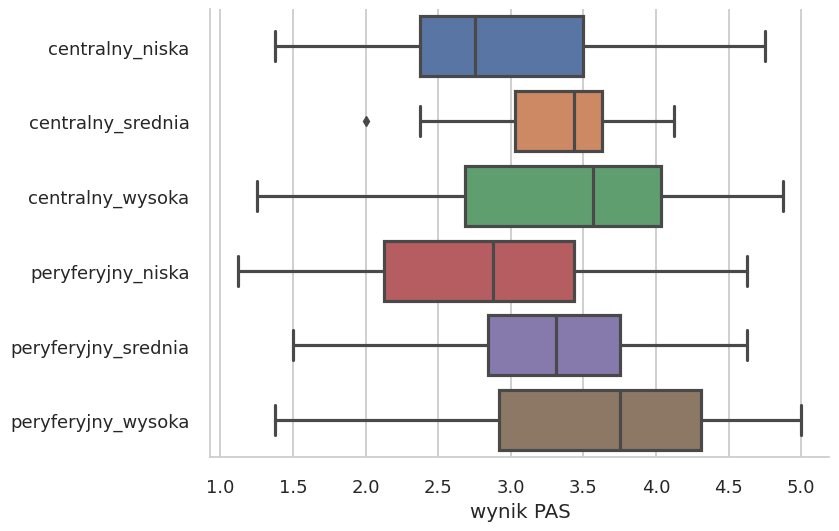

In [ ]:
ff = sns.catplot(kind = 'box', data = df.sort_values(by = 'tor_waznosc_3cat'), y = 'tor_waznosc_3cat', x = 'wynik_ogólny',
            hue = 'tor_waznosc_3cat', aspect=1.6, height=5.5, dodge=False, legend=False)
ff.set(xlabel='wynik PAS', ylabel = '')
plt.show()

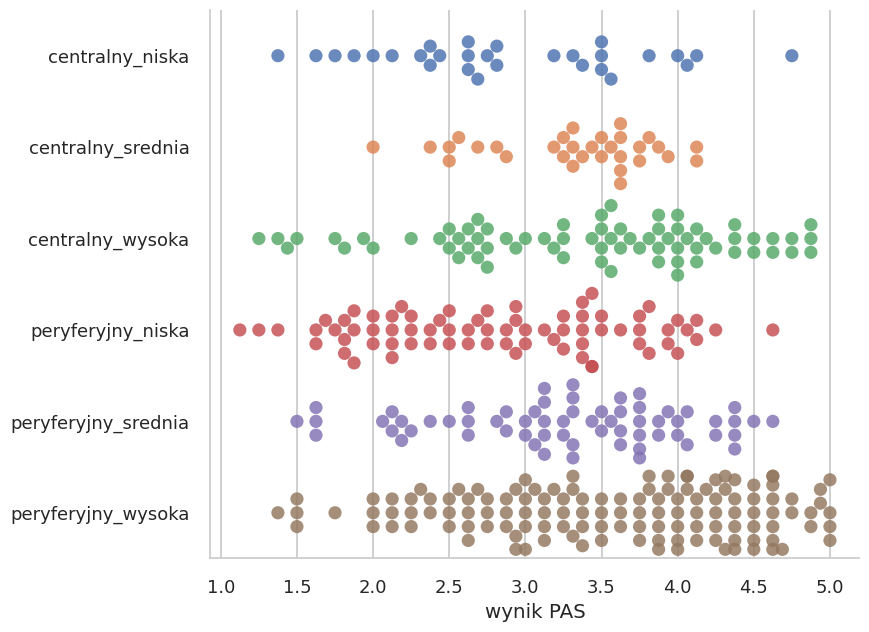

In [ ]:
ff = sns.catplot(kind = 'swarm', data = df.sort_values(by = 'tor_waznosc_3cat'), y = 'tor_waznosc_3cat', x = 'wynik_ogólny',
            hue = 'tor_waznosc_3cat', aspect=1.4, height=6.5, dodge=False, legend=False, s=90, alpha=0.83)
ff.set(xlabel='wynik PAS', ylabel = '')
plt.show()

In [ ]:
df.columns

Index(['kod', 'komunikat', 'bon', 'płeć', 'wiek', 'tryb', 'rok', 'waznosc',
       'Nastroj1', 'Nastroj2', 'indeks_przychylności', 'wynik_ogólny',
       'nastroj_diff', 'Nastroj1_mapped', 'komunikat_mapped',
       'Nastroj1_komunikat_congruence', 'Nastroj1_komunikat_congruence_abs',
       'plec_komunikat_bon', 'komunikat_bon',
       'Nastroj1_komunikat_congruence_komunikat', 'tor', 'Nastroj1_3cat',
       'Nastroj2_3cat', 'waznosc_3cat', 'tor_waznosc_3cat',
       'komunikat_Nastroj1_3cat'],
      dtype='object')

In [ ]:

for d in ['wynik_ogólny']:
  p0 = df[df.Nastroj1_3cat == 'neutral'][d].values
  p1 = df[df.Nastroj1_3cat == 'good'][d].values
  p2 = df[df.Nastroj1_3cat == 'bad'][d].values
  print(d)

  value, p = ttest_ind(p1, p2) # , alternative='greater'
  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

  value, p = ttest_ind(p0, p1) # , alternative='greater'
  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

  value, p = ttest_ind(p0, p2) # , alternative='greater'
  if round(p*3 , 2) < 0.05:
  #if round(p , 2) < 0.05:
    print("reject H0")
    cd = cohend(p1, p2)
    cd = round(cd, 2)
    print('t: ', value.round(3), 'p-value: ', p.round(4), 'effect size: ', cd, "\n")
  else:
    print("do NOT reject H0")
    print(value, p.round(4), "\n")

##correlations PAS

In [159]:
from scipy.stats import spearmanr, kendalltau

In [ ]:
stat, pv = spearmanr(df[df.komunikat == 1]['wynik_ogólny'].values, df[df.komunikat == 1]['Nastroj1'].values)
print(round(stat, 3), round(pv, 4))

stat, pv = spearmanr(df[df.komunikat == 2]['wynik_ogólny'].values, df[df.komunikat == 2]['Nastroj1'].values)
print(round(stat, 3), round(pv, 4))

stat, pv = spearmanr(df[df.komunikat == 0]['wynik_ogólny'].values, df[df.komunikat == 0]['Nastroj1'].values)
print(round(stat, 3), round(pv, 4))

0.029 0.7442
0.154 0.0765
0.205 0.0191


In [ ]:
stat, pv = spearmanr(df[df.komunikat == 1]['wynik_ogólny'].values, df[df.komunikat == 1]['Nastroj2'].values)
print(round(stat, 3), round(pv, 4))

stat, pv = spearmanr(df[df.komunikat == 2]['wynik_ogólny'].values, df[df.komunikat == 2]['Nastroj2'].values)
print(round(stat, 3), round(pv, 4))

stat, pv = spearmanr(df[df.komunikat == 0]['wynik_ogólny'].values, df[df.komunikat == 0]['Nastroj2'].values)
print(round(stat, 3), round(pv, 4))

0.399 0.0
0.526 0.0
0.241 0.0057


In [ ]:
ktau = []
ppktau = []
catktau = []

spear = []
ppspear = []
catspear = []

In [ ]:
for i in range(1):

  stat, pv = spearmanr(df['wynik_ogólny'].values, df['wiek'].values)
  spear.append(round(stat, 3))
  ppspear.append(round(pv, 4))
  print(spearmanr(df['wynik_ogólny'].values, df['wiek'].values))

SignificanceResult(statistic=-0.00642465821426916, pvalue=0.8987154603996326)


In [ ]:
for i in range(1):
  stat, pv = spearmanr(df['wynik_ogólny'].values, df['Nastroj1'].values)
  spear.append(round(stat, 3))
  ppspear.append(round(pv, 4))
  print(spearmanr(df['wynik_ogólny'].values, df['Nastroj1'].values))


SignificanceResult(statistic=0.12198463555417031, pvalue=0.015275577848445429)


In [ ]:
for i in range(1):
  stat, pv = spearmanr(df['wynik_ogólny'].values, df['Nastroj2'].values)
  spear.append(round(stat, 3))
  ppspear.append(round(pv, 4))
  print(round(stat, 3), round(pv, 4))

0.416 0.0


In [ ]:
for i in range(1):
  stat, pv = spearmanr(df['wynik_ogólny'].values, df['waznosc'].values)
  spear.append(round(stat, 3))
  ppspear.append(round(pv, 4))
  print(round(stat, 3), round(pv, 4))


  stat, pv = kendalltau(df['wynik_ogólny'].values, df['waznosc'].values)
  print(round(stat, 3), round(pv, 4))
  ktau.append(round(stat, 3))
  ppktau.append(round(pv, 4))

0.316 0.0
0.245 0.0


In [ ]:
for i in range(1):
  stat, pv = spearmanr(df['wiek'].values, df['waznosc'].values)
  print(round(stat, 3), round(pv, 4))

  stat, pv = kendalltau(df['wiek'].values, df['waznosc'].values)
  print(round(stat, 3), round(pv, 4))

0.198 0.0001
0.151 0.0001


In [ ]:
# https://www.statology.org/three-way-anova-python/

# Three-Way ANOVA in Python

##anova

###standard ANOVA

In [ ]:
for dep in {'wynik_ogólny'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+C(Nastroj2_3cat)+C(Nastroj1_3cat)+\
                    C(komunikat):C(Nastroj2_3cat)+C(komunikat):C(Nastroj1_3cat)+\

                    C(komunikat):C(Nastroj2_3cat):C(Nastroj1_3cat)""",
              data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

wynik_ogólny
                                                  sum_sq     df        F  \
C(komunikat)                                      0.3640    2.0   0.2848   
C(Nastroj2_3cat)                                 49.2437    2.0  38.5396   
C(Nastroj1_3cat)                                  6.4336    2.0   5.0351   
C(komunikat):C(Nastroj2_3cat)                     7.9809    4.0   3.1231   
C(komunikat):C(Nastroj1_3cat)                     6.6160    4.0   2.5889   
C(komunikat):C(Nastroj2_3cat):C(Nastroj1_3cat)    3.7948   12.0   0.4950   
Residual                                        235.1048  368.0      NaN   

                                                PR(>F)  
C(komunikat)                                    0.7523  
C(Nastroj2_3cat)                                0.0000  
C(Nastroj1_3cat)                                0.0070  
C(komunikat):C(Nastroj2_3cat)                   0.0151  
C(komunikat):C(Nastroj1_3cat)                   0.0366  
C(komunikat):C(Nastroj2_3cat):C(Nast

In [ ]:
cols = ['indeks_przychylności', 'wynik_ogólny']

In [77]:
df.wynik_ogólny.describe()

count    395.000000
mean       3.277373
std        0.893152
min        1.125000
25%        2.625000
50%        3.375000
75%        4.000000
max        5.000000
Name: wynik_ogólny, dtype: float64

In [78]:
df.groupby(['Nastroj2_3cat'])['wynik_ogólny'].mean().round(2)

Nastroj2_3cat
0.0    3.42
1.0    3.65
2.0    2.71
Name: wynik_ogólny, dtype: float64

In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj2_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0   0.2253 0.0564 -0.0047  0.4553  False
   0.0    2.0  -0.7124    0.0 -0.9451 -0.4797   True
   1.0    2.0  -0.9377    0.0 -1.1828 -0.6926   True
----------------------------------------------------


In [80]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['waznosc_3cat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0   0.2205 0.0986 -0.0307  0.4717  False
   0.0    2.0  -0.4348 0.0012 -0.7218 -0.1479   True
   1.0    2.0  -0.6553    0.0 -0.8997 -0.4109   True
----------------------------------------------------


In [37]:
##

for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+C(Nastroj1_komunikat_congruence_2)+C(waznosc)+C(bon):C(płeć):C(komunikat)+\
      C(rok)""",
              data = df[df.płeć.isin([1,2])]).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

nastroj_diff
                                      sum_sq     df        F  PR(>F)
C(komunikat)                          7.6887    2.0   8.6492  0.0002
C(Nastroj1_komunikat_congruence_2)   59.1551    8.0  16.6363  0.0000
C(waznosc)                            5.1601    4.0   2.9024  0.0219
C(rok)                                1.6530    1.0   3.7190  0.0546
C(bon):C(płeć):C(komunikat)          19.4494    9.0   4.8620  0.0000
Residual                            160.4552  361.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     10.61
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           2.21e-29
Time:                        13:41:27   Log-Likelihood:                -378.29
No. Observations:             

In [31]:
##

for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+C(Nastroj1_komunikat_congruence_2)+C(waznosc)+C(bon):C(płeć):C(komunikat)+\
      C(rok)+C(Nastroj1_komunikat_congruence_2_komunikat)""",
              data = df[df.płeć.isin([1,2])]).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

nastroj_diff
                                                sum_sq     df        F  PR(>F)
C(komunikat)                                    1.6871    2.0   1.8836  0.1536
C(Nastroj1_komunikat_congruence_2)             63.4302    8.0  17.7043  0.0000
C(waznosc)                                      4.9078    4.0   2.7397  0.0286
C(rok)                                          1.6608    1.0   3.7085  0.0549
C(Nastroj1_komunikat_congruence_2_komunikat)   88.4504   14.0  14.1073  0.0000
C(bon):C(płeć):C(komunikat)                    19.6955    9.0   4.8865  0.0000
Residual                                      159.8807  357.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     9.074
Date:                Thu, 29 Jun 2023  

In [39]:
for c in {'nastroj_diff'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1_komunikat_congruence_2_komunikat'],
                          alpha=0.05)
  #display results
  print(tukey)

nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  -1_0   -1_1  -0.3002 0.9526 -0.9314   0.331  False
  -1_0   -2_0   0.3258 0.9942 -0.5384  1.1899  False
  -1_0   -2_1   0.0591    1.0 -0.5801  0.6983  False
  -1_0   -3_1    0.651 0.0682 -0.0203  1.3223  False
  -1_0   -4_1   1.2424 0.0011  0.2896  2.1952   True
  -1_0    0_0  -0.0737    1.0 -0.6766  0.5293  False
  -1_0    0_1  -0.4659  0.958 -1.4601  0.5283  False
  -1_0    0_2   0.5758 0.9077 -0.5333  1.6848  False
  -1_0    1_0  -0.4338 0.6207 -1.0889  0.2214  False
  -1_0    1_2  -0.0909    1.0 -0.7668   0.585  False
  -1_0    2_0  -0.5909 0.9693 -1.8998   0.718  False
  -1_0    2_2  -0.4465 0.4918 -1.0729    0.18  False
  -1_0    3_2  -1.0455    0.0 -1.6742 -0.4167   True
  -1_0    4_2  -0.2159    1.0 -1.2101  0.7783  False
  -1_1   -2_0    0.626 0.2979 -0.1602  1.4121  False
  -1_1   -2_1   0.3593 0.5771 -0.

In [41]:
for c in {'nastroj_diff'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat'],
                          alpha=0.05)
  #display results
  print(tukey)

nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.2672 0.0201  0.0338  0.5005   True
     0      2  -0.3677 0.0007 -0.6002 -0.1353   True
     1      2  -0.6349    0.0 -0.8674 -0.4025   True
----------------------------------------------------


In [83]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['nastroj_diff'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    -3     -2   1.1399 0.8806 -1.4416 3.7214  False
    -3     -1   1.3069 0.7694  -1.234 3.8478  False
    -3      0   1.8338 0.3472 -0.6935 4.3612  False
    -3      1   2.2934  0.113 -0.2544 4.8411  False
    -3      2   2.5573 0.0624 -0.0678 5.1824  False
    -3      3     1.25  0.963 -2.3168 4.8168  False
    -3      4    0.625 0.9995 -2.9418 4.1918  False
    -2     -1    0.167 0.9927 -0.4637 0.7978  False
    -2      0    0.694 0.0063  0.1203 1.2676   True
    -2      1   1.1535    0.0  0.4957 1.8113   True
    -2      2   1.4174 0.0001  0.5047 2.3301   True
    -2      3   0.1101    1.0 -2.4714 2.6916  False
    -2      4  -0.5149 0.9988 -3.0964 2.0666  False
    -1      0   0.5269 0.0001  0.1789  0.875   True
    -1      1   0.9865    0.0  0.5124 1.4606   True
    -1      2   1.2504 0.0001  0.4598  2.041   True

In [82]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['Nastroj1'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2    0.413 0.2151 -0.1218 0.9478  False
     1      3   0.6559 0.0039  0.1495 1.1624   True
     1      4   0.5948 0.0139  0.0815 1.1082   True
     1      5   0.6576 0.0859 -0.0545 1.3697  False
     2      3   0.2429 0.2684 -0.0901  0.576  False
     2      4   0.1818 0.5949 -0.1616 0.5253  False
     2      5   0.2447 0.7985 -0.3566 0.8459  False
     3      4  -0.0611 0.9803 -0.3586 0.2364  False
     3      5   0.0017    1.0 -0.5745 0.5779  False
     4      5   0.0628 0.9983 -0.5195 0.6451  False
---------------------------------------------------


In [85]:
df.groupby('Nastroj2').wynik_ogólny.mean().round(2).reset_index()

,Nastroj2,wynik_ogólny
0,1,2.21
1,2,2.88
2,3,3.42
3,4,3.65
4,5,3.64


In [86]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['waznosc'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.4112  0.122 -0.0616 0.8841  False
     1      3   0.6888 0.0002  0.2468 1.1309   True
     1      4   0.8231    0.0  0.3874 1.2589   True
     1      5   1.0037    0.0  0.5623  1.445   True
     2      3   0.2776 0.2614 -0.1003 0.6555  False
     2      4   0.4119 0.0208  0.0414 0.7824   True
     2      5   0.5924 0.0002  0.2154 0.9695   True
     3      4   0.1343  0.799  -0.196 0.4645  False
     3      5   0.3148 0.0808 -0.0228 0.6524  False
     4      5   0.1806 0.5615 -0.1488 0.5099  False
---------------------------------------------------


In [87]:
df.groupby('waznosc').wynik_ogólny.mean().round(2).reset_index()

,waznosc,wynik_ogólny
0,1,2.59
1,2,3.00
2,3,3.28
3,4,3.41
4,5,3.59


In [50]:
for dep in {'wynik_ogólny'}:
  print(dep)
  model = ols(f"""{dep} ~ C(nastroj_diff)+C(waznosc)+C(komunikat)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

wynik_ogólny
                   sum_sq     df        F  PR(>F)
C(nastroj_diff)   41.7235    7.0   9.8922  0.0000
C(waznosc)        35.3240    4.0  14.6561  0.0000
C(komunikat)       1.4781    2.0   1.2266  0.2944
Residual         229.5704  381.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           wynik_ogólny   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     10.82
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           1.08e-19
Time:                        13:49:17   Log-Likelihood:                -453.30
No. Observations:                 395   AIC:                             934.6
Df Residuals:                     381   BIC:                             990.3
Df Model:                          13                                         
Covariance Type:          

In [46]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['nastroj_diff'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    -3     -2   1.1399 0.8806 -1.4416 3.7214  False
    -3     -1   1.3069 0.7694  -1.234 3.8478  False
    -3      0   1.8338 0.3472 -0.6935 4.3612  False
    -3      1   2.2934  0.113 -0.2544 4.8411  False
    -3      2   2.5573 0.0624 -0.0678 5.1824  False
    -3      3     1.25  0.963 -2.3168 4.8168  False
    -3      4    0.625 0.9995 -2.9418 4.1918  False
    -2     -1    0.167 0.9927 -0.4637 0.7978  False
    -2      0    0.694 0.0063  0.1203 1.2676   True
    -2      1   1.1535    0.0  0.4957 1.8113   True
    -2      2   1.4174 0.0001  0.5047 2.3301   True
    -2      3   0.1101    1.0 -2.4714 2.6916  False
    -2      4  -0.5149 0.9988 -3.0964 2.0666  False
    -1      0   0.5269 0.0001  0.1789  0.875   True
    -1      1   0.9865    0.0  0.5124 1.4606   True
    -1      2   1.2504 0.0001  0.4598  2.041   True

In [48]:
df.groupby('nastroj_diff')['wynik_ogólny'].mean().round(3).reset_index()

,nastroj_diff,wynik_ogólny
0,-3,1.500
1,-2,2.640
2,-1,2.807
3,0,3.334
4,1,3.793
5,2,4.057
6,3,2.750
7,4,2.125


In [ ]:
for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')


nastroj_diff
                sum_sq     df        F  PR(>F)
C(komunikat)   26.8466    2.0  20.8343     0.0
Residual      252.5610  392.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     20.83
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           2.52e-09
Time:                        10:54:45   Log-Likelihood:                -472.15
No. Observations:                 395   AIC:                             950.3
Df Residuals:                     392   BIC:                             962.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      

In [ ]:
for dep in {'wynik_ogólny'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat_nastroj_diff)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')


wynik_ogólny
                            sum_sq     df       F  PR(>F)
C(komunikat_nastroj_diff)  19.6827   11.0  3.2937  0.0005
Residual                   77.1432  142.0     NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           wynik_ogólny   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     3.294
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           0.000477
Time:                        09:19:19   Log-Likelihood:                -165.29
No. Observations:                 154   AIC:                             354.6
Df Residuals:                     142   BIC:                             391.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       

In [ ]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat_nastroj_diff'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  0_-1    0_0  -0.4703 0.9714 -1.6322  0.6916  False
  0_-1    0_1   0.1125    1.0 -1.4367  1.6617  False
  0_-1   1_-1  -0.4125 0.9992 -1.9617  1.1367  False
  0_-1   1_-2   -1.525 0.3656 -3.5744  0.5244  False
  0_-1    1_0  -0.0458    1.0 -1.2094  1.1177  False
  0_-1    1_1  -0.1187    1.0  -1.602  1.3645  False
  0_-1    1_2  -1.9625 0.3928 -4.6458  0.7208  False
  0_-1   2_-1     -0.4 0.9984 -1.7964  0.9964  False
  0_-1   2_-2  -1.3531 0.2197 -2.9963  0.2901  False
  0_-1    2_0  -0.0285    1.0 -1.1975  1.1406  False
  0_-1    2_1   0.5583 0.9965 -1.2305  2.3472  False
   0_0    0_1   0.5828 0.8799 -0.5791  1.7447  False
   0_0   1_-1   0.0578    1.0 -1.1041  1.2197  False
   0_0   1_-2  -1.0547 0.7094 -2.8295  0.7202  False
   0_0    1_0   0.4245 0.3131 -0.1268  0.9757  False
   0_0    1_1   0.3516 0.9947 -0.

In [51]:
for dep in {'wynik_ogólny'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')


wynik_ogólny
                sum_sq     df       F  PR(>F)
C(komunikat)    4.9694    2.0  3.1487   0.044
Residual      309.3323  392.0     NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           wynik_ogólny   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.149
Date:                Thu, 29 Jun 2023   Prob (F-statistic):             0.0440
Time:                        13:51:23   Log-Likelihood:                -512.20
No. Observations:                 395   AIC:                             1030.
Df Residuals:                     392   BIC:                             1042.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|

In [53]:
for c in {'wynik_ogólny'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat'],
                          alpha=0.05)
  #display results
  print(tukey)

wynik_ogólny
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.1594 0.3155 -0.0989 0.4176  False
     0      2  -0.1139  0.551 -0.3712 0.1433  False
     1      2  -0.2733 0.0343 -0.5305 -0.016   True
---------------------------------------------------


In [54]:
for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

nastroj_diff
                sum_sq     df        F  PR(>F)
C(komunikat)   26.8466    2.0  20.8343     0.0
Residual      252.5610  392.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     20.83
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           2.52e-09
Time:                        13:51:56   Log-Likelihood:                -472.15
No. Observations:                 395   AIC:                             950.3
Df Residuals:                     392   BIC:                             962.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      

In [55]:
for c in {'nastroj_diff'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat'],
                          alpha=0.05)
  #display results
  print(tukey)

nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.2672 0.0201  0.0338  0.5005   True
     0      2  -0.3677 0.0007 -0.6002 -0.1353   True
     1      2  -0.6349    0.0 -0.8674 -0.4025   True
----------------------------------------------------


In [56]:
for dep in {'nastroj_diff'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat):C(Nastroj1)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print(model.summary())
  print('\n ********************************')

nastroj_diff
                            sum_sq     df        F  PR(>F)
C(komunikat):C(Nastroj1)   90.3490   14.0  12.9713     0.0
Residual                  189.0586  380.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:           nastroj_diff   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     12.97
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           5.22e-25
Time:                        13:52:37   Log-Likelihood:                -414.96
No. Observations:                 395   AIC:                             859.9
Df Residuals:                     380   BIC:                             919.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    

In [57]:
df['komunikat_Nastroj1'] = df['komunikat'].astype('str') + "_" + df['Nastroj1'].astype('str')
df['komunikat_Nastroj1'].value_counts()

0_3    58
2_3    45
2_4    44
1_4    43
1_3    40
0_4    35
1_2    31
2_2    30
0_2    22
0_1    12
1_1     9
2_5     8
1_5     8
2_1     6
0_5     4
Name: komunikat_Nastroj1, dtype: int64

In [58]:
for c in {'nastroj_diff'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat_Nastroj1'],
                          alpha=0.05)
  #display results
  print(tukey)

nastroj_diff
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0_1    0_2  -0.3258 0.9942 -1.1899  0.5384  False
   0_1    0_3  -0.3994 0.9027 -1.1631  0.3642  False
   0_1    0_4  -0.7595 0.0888 -1.5651   0.046  False
   0_1    0_5  -0.9167 0.6276 -2.3069  0.4736  False
   0_1    1_1   0.9167   0.18 -0.1452  1.9785  False
   0_1    1_2   0.3253 0.9904 -0.4934   1.144  False
   0_1    1_3  -0.2667 0.9982 -1.0592  0.5259  False
   0_1    1_4   -0.626 0.2979 -1.4121  0.1602  False
   0_1    1_5  -0.7917 0.4727 -1.8908  0.3074  False
   0_1    2_1     0.25    1.0  -0.954   1.454  False
   0_1    2_2  -0.4167 0.9228 -1.2392  0.4058  False
   0_1    2_3  -0.7722 0.0572 -1.5546  0.0101  False
   0_1    2_4  -1.3712    0.0 -2.1554  -0.587   True
   0_1    2_5  -0.5417 0.9373 -1.6408  0.5574  False
   0_2    0_3  -0.0737    1.0 -0.6766  0.5293  False
   0_2    0_4  -0.4338 0.6207 -1.

In [61]:
df['komunikat_bon'] = df['komunikat'].astype('str') + "_" + df['bon'].astype('str')
df['komunikat_bon'].value_counts()

2_0    69
0_1    66
1_1    66
1_0    65
0_0    65
2_1    64
Name: komunikat_bon, dtype: int64

In [62]:
for dep in {'Nastroj2'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print('\n ********************************')

Nastroj2
                sum_sq     df       F  PR(>F)
C(komunikat)   22.3982    2.0  11.914     0.0
Residual      368.4778  392.0     NaN     NaN

 ********************************


In [63]:
for dep in {'Nastroj2'}:
  print(dep)
  model = ols(f"""{dep} ~ C(komunikat)+ C(Nastroj1) +
               C(komunikat):C(Nastroj1)""", data = df).fit()

  print(sm.stats.anova_lm(model, typ=2).round(4))
  print( model.summary() )
  print('\n ********************************')

Nastroj2
                            sum_sq     df        F  PR(>F)
C(komunikat)               24.6231    2.0  24.7458  0.0000
C(Nastroj1)               169.8636    4.0  85.3547  0.0000
C(komunikat):C(Nastroj1)    9.5556    8.0   2.4008  0.0155
Residual                  189.0586  380.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:               Nastroj2   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     28.97
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           1.66e-51
Time:                        13:54:16   Log-Likelihood:                -414.96
No. Observations:                 395   AIC:                             859.9
Df Residuals:                     380   BIC:                             919.6
Df Model:                          14                           

In [64]:
for c in {'Nastroj2'}:
  print(c)
  tukey = pairwise_tukeyhsd(endog = df[c],
                          groups = df['komunikat_Nastroj1'],
                          alpha=0.05)
  #display results
  print(tukey)

Nastroj2
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0_1    0_2   0.6742 0.3316 -0.1899  1.5384  False
   0_1    0_3   1.6006    0.0  0.8369  2.3642   True
   0_1    0_4   2.2405    0.0  1.4349   3.046   True
   0_1    0_5   3.0833    0.0  1.6931  4.4736   True
   0_1    1_1   0.9167   0.18 -0.1452  1.9785  False
   0_1    1_2   1.3253    0.0  0.5066   2.144   True
   0_1    1_3   1.7333    0.0  0.9408  2.5259   True
   0_1    1_4    2.374    0.0  1.5879  3.1602   True
   0_1    1_5   3.2083    0.0  2.1092  4.3074   True
   0_1    2_1     0.25    1.0  -0.954   1.454  False
   0_1    2_2   0.5833 0.5006 -0.2392  1.4058  False
   0_1    2_3   1.2278    0.0  0.4454  2.0101   True
   0_1    2_4   1.6288    0.0  0.8446   2.413   True
   0_1    2_5   3.4583    0.0  2.3592  4.5574   True
   0_2    0_3   0.9263    0.0  0.3234  1.5293   True
   0_2    0_4   1.5662    0.0  0.9111

In [67]:
ccols = ['wiek', 'tryb', 'rok', 'waznosc',
       'Nastroj1', 'Nastroj2', 'indeks_przychylności', 'wynik_ogólny',
       'nastroj_diff']

In [68]:
df[ccols].corr().round(2)

,wiek,tryb,rok,waznosc,Nastroj1,Nastroj2,indeks_przychylności,wynik_ogólny,nastroj_diff
wiek,1.00,0.37,0.45,0.17,-0.08,-0.06,-0.09,0.05,0.02
tryb,0.37,1.00,-0.00,-0.05,-0.03,-0.01,-0.12,-0.02,0.02
rok,0.45,-0.00,1.00,0.21,-0.24,-0.24,-0.23,-0.07,-0.00
waznosc,0.17,-0.05,0.21,1.00,0.00,0.01,0.25,0.32,0.01
Nastroj1,-0.08,-0.03,-0.24,0.00,1.00,0.64,0.23,0.15,-0.42
Nastroj2,-0.06,-0.01,-0.24,0.01,0.64,1.00,0.47,0.44,0.42
indeks_przychylności,-0.09,-0.12,-0.23,0.25,0.23,0.47,1.00,0.74,0.29
wynik_ogólny,0.05,-0.02,-0.07,0.32,0.15,0.44,0.74,1.00,0.34
nastroj_diff,0.02,0.02,-0.00,0.01,-0.42,0.42,0.29,0.34,1.00


###mixed Anova

In [69]:
ind_var = 'komunikat'

In [70]:
colspr = df.groupby(['kod', ind_var], as_index=False)['Nastroj1'].mean().round(2)
colspo = df.groupby(['kod', ind_var], as_index=False)['Nastroj2'].mean().round(2)
colspo

,kod,komunikat,Nastroj2
0,2002-03-01 00:00:00,1,3.0
1,AAA04,1,4.0
2,AAA1,1,5.0
3,AAD12,2,3.0
4,AAJ01,1,2.0
...,...,...,...
390,ZMM12,2,4.0
391,ZMW09,2,3.0
392,ZOR07,0,4.0
393,ZRX,0,3.0


In [71]:
colspo = colspo.melt(['kod', ind_var])
colspo.head(3)

,kod,komunikat,variable,value
0,2002-03-01 00:00:00,1,Nastroj2,3.0
1,AAA04,1,Nastroj2,4.0
2,AAA1,1,Nastroj2,5.0


In [72]:
colspr = colspr.melt(['kod', ind_var])
colspr['test'] = 'pretest'
colspo['test'] = 'posttest'

In [ ]:
df_line = pd.concat([colspr, colspo], axis = 0, ignore_index = False)
df_line.iloc[::40]

In [74]:
!pip install pingouin --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [75]:
import pingouin as pg

In [76]:
print(pg.mixed_anova(dv='value', between= 'komunikat', within='test', subject='kod', data=df_line).round(3))
print('\n ********************************')

        Source      SS  DF1  DF2     MS       F  p-unc    np2  eps
0    komunikat  10.661    2  392  5.330   3.307  0.038  0.017  NaN
1         test   1.296    1  392  1.296   4.024  0.046  0.010  1.0
2  Interaction  13.423    2  392  6.712  20.834  0.000  0.096  NaN

 ********************************
